# Assignment 1

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.1 MB/s 
     |████████████████████████████████| 30.5 MB 56.9 MB/s 
     |████████████████████████████████| 6.3 MB 47.6 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 


In [ ]:
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 57 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#required libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/cleaned_data.xlsx')

In [ ]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [ ]:
df.shape

(143708, 32)

**exploratory analysis of the given data**

In [ ]:
#columns in the data
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

In [ ]:
#data type of the each column in the dataframe
df.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                    int64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

analysing each object type column

In [ ]:
df['Property_type'].unique()

array(['Apartment', 'Independent House', 'Villa', 'Independent Floor',
       'Residential Plot'], dtype=object)

In [ ]:
df['Property_status'].unique()

array(['Under Construction', 'Ready to move'], dtype=object)

In [ ]:
df['Property_building_status'].unique()

array(['ACTIVE', 'INACTIVE', 'UNVERIFIED'], dtype=object)

In [ ]:
df['City_name'].unique()

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Lucknow', 'Mumbai'], dtype=object)

In [ ]:
df['Price'].describe()

count        143708
unique        29490
top       90,00,000
freq           1181
Name: Price, dtype: object

#division of budget ranges(first requirement)

motivation : Generally in a ideal society the population distribution over income will be like slight high number of middle class people and low number of low and upper class people

Here we decided to categorize the budget ranges on the basis of the relation between the price and number of tuples.

In [ ]:
list1 = list(df['Price'])
price_list = []
for i in list1:
  price_list.append(float(i.replace(",","")))

In [ ]:
max_price = max(price_list)
min_price = min(price_list)
average_price = sum(price_list)/len(price_list)

In [ ]:
print(min(price_list),max(price_list),sum(price_list)/len(price_list))

100000.0 800000000.0 13650943.067859827


In [ ]:
pd.DataFrame(price_list).describe()

,0
count,1.437080e+05
mean,1.365094e+07
std,1.940871e+07
min,1.000000e+05
25%,5.259438e+06
50%,8.500000e+06
75%,1.549800e+07
max,8.000000e+08


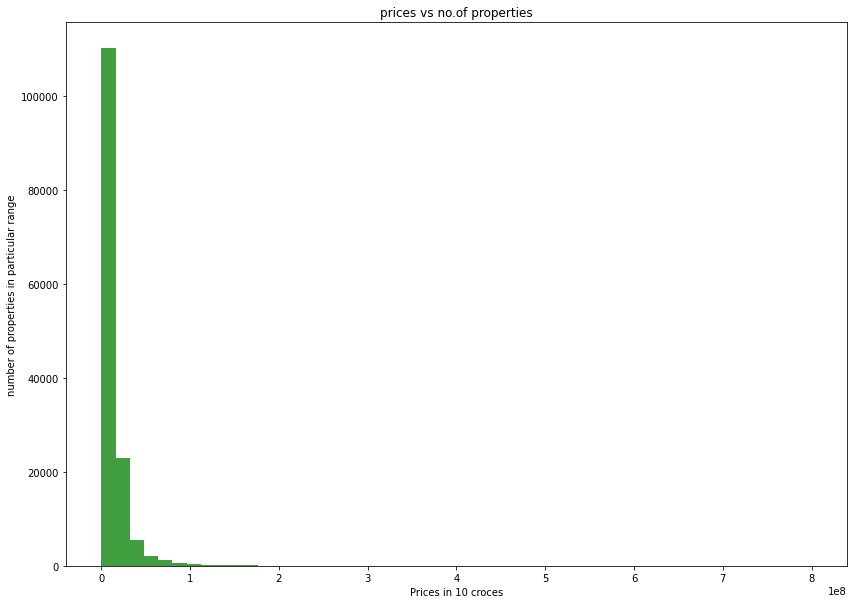

In [ ]:
#histogram between prices and the number of properties 
price_array = np.array(price_list)
fig, ax = plt.subplots(figsize =(14,10))
n_bins = 20
ax.hist(price_array,50, facecolor='g', alpha=0.75)
plt.xlabel("Prices in 10 croces")
plt.ylabel("number of properties in particular range")
plt.title("prices vs no.of properties")
plt.show()

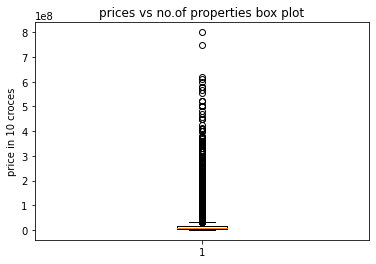

In [ ]:
#box plot of prices for the whole list of the properties.
plt.boxplot(price_list)
plt.ylabel("price in 10 croces")
plt.title("prices vs no.of properties box plot")
plt.show()

In [ ]:
#properties which are greater than the mean price 
price_list_above_mean = []
for i in price_list:
  if i > average_price:
    price_list_above_mean.append(i)

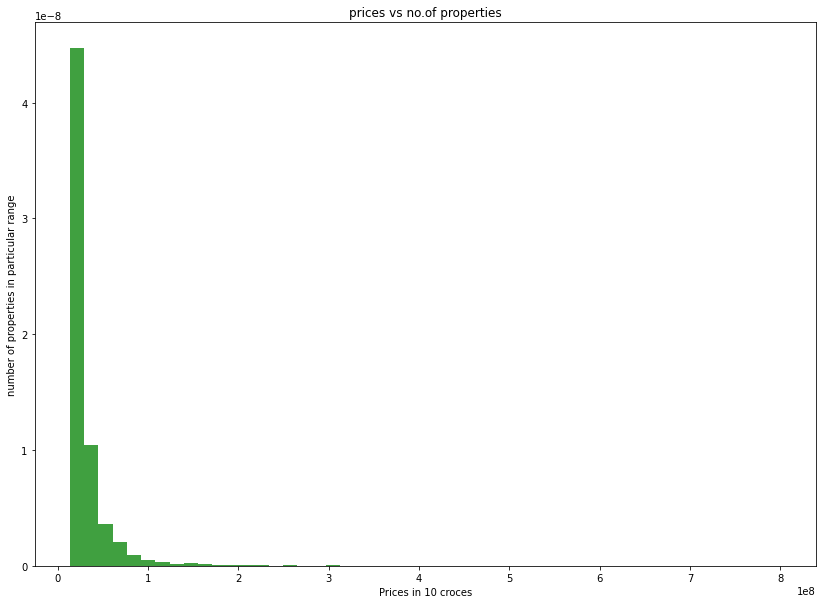

In [ ]:
price_array = np.array(price_list_above_mean)
fig, ax = plt.subplots(figsize =(14,10))
n_bins = 20
ax.hist(price_array,50, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Prices in 10 croces")
plt.ylabel("number of properties in particular range")
plt.title("prices vs no.of properties")
plt.show()

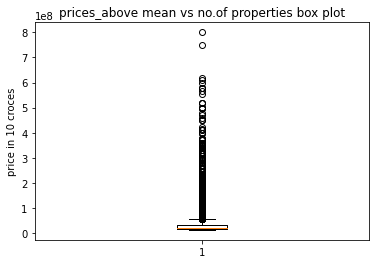

In [ ]:
plt.boxplot(price_list_above_mean)
plt.ylabel("price in 10 croces")
plt.title("prices_above mean vs no.of properties box plot")
plt.show()

from above histograms and box plots we came to a inference that we can categorize one of the budget range to be greater than mean as most of the less than it.

In [ ]:
price_list_below_mean = []
for i in price_list:
  if i <= average_price:
    price_list_below_mean.append(i)

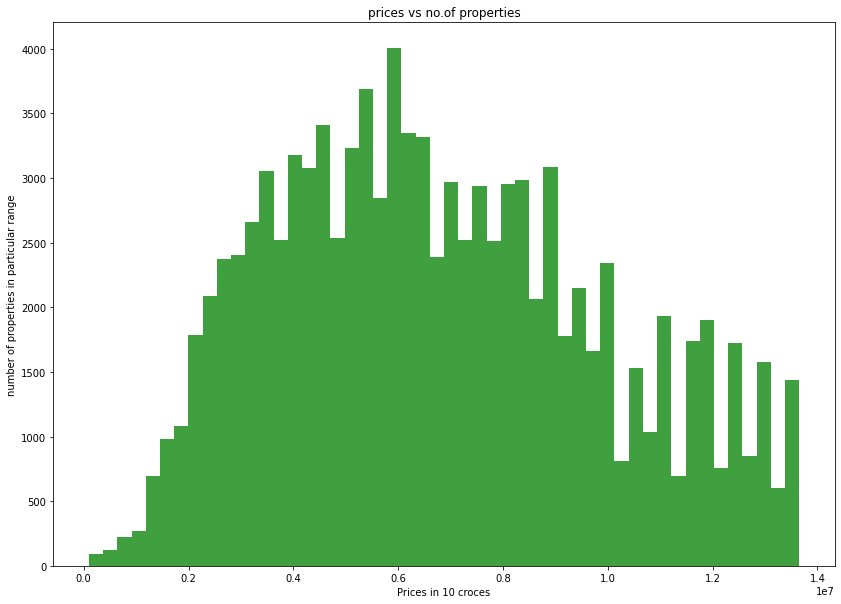

In [ ]:
price_array = np.array(price_list_below_mean)
fig, ax = plt.subplots(figsize =(14,10))
n_bins = 20
ax.hist(price_array,50, facecolor='g', alpha=0.75)
plt.xlabel("Prices in 10 croces")
plt.ylabel("number of properties in particular range")
plt.title("prices vs no.of properties")
plt.show()

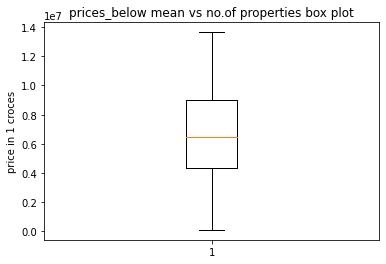

In [ ]:
plt.boxplot(price_list_below_mean)
plt.ylabel("price in 1 croces")
plt.title("prices_below mean vs no.of properties box plot") 
plt.show()

In [ ]:
pd.DataFrame(price_list_below_mean).describe()

,0
count,1.019170e+05
mean,6.797395e+06
std,3.109730e+06
min,1.000000e+05
25%,4.310000e+06
50%,6.500000e+06
75%,9.000000e+06
max,1.365000e+07


As the data is continuous we used histograms and as we decided on play on the count of the properties the box plots will be suitable 

from the above histogram and box plot we infer that the below 43 lakhs in one budget range 

The inferences we made were:

1)One budget range is above the mean of the prices as they were nearly 30% of properties

2)Another was below the 25 percentile of the properties which are present below the mean.

Therefore the final budget ranges were:
  
  a)0-43,00,000

  b)43,00,000-1,40,00,000

  c)above 1,40,00,000


we rounded of the budget ranges as it will be the case in the real world

#Insights on tech Emerging cities Properties(2nd requirement)

In [ ]:
#list of the technology emerging cities in the given data
tech_emerging_cities = ['Hyderabad','Chennai','Bangalore']

In [ ]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))

providing the visualisation(stacked bar graph) of each property type in the each tech emerging city 

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


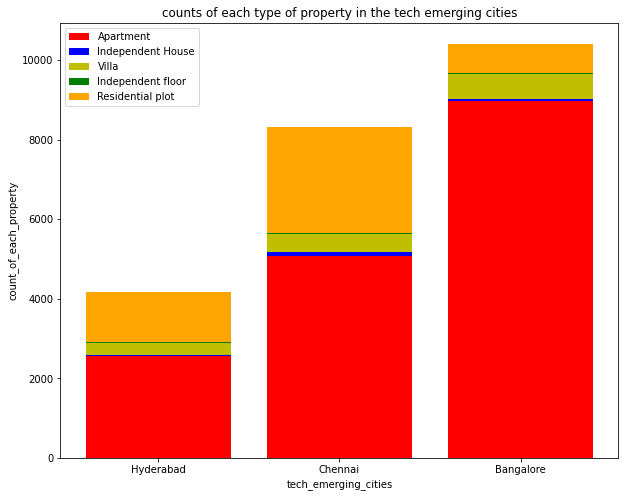

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities")
plt.show()

providing the visualisation(stacked bar graph) of each property type in the respective budget ranges we defined of each tech emerging city 

Low Budget range

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['Price']<4300000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


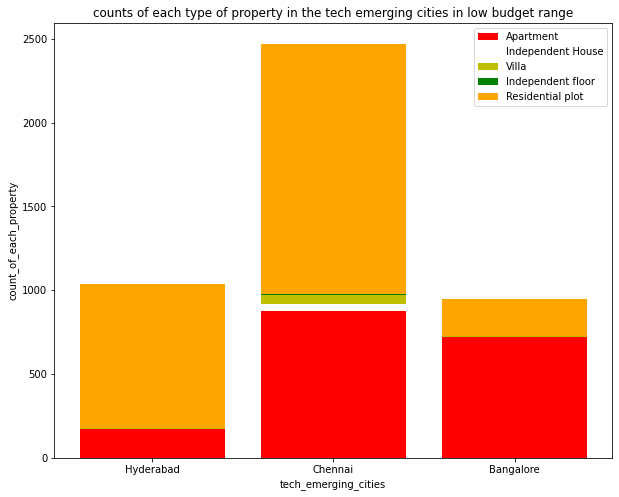

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities in low budget range")
plt.show()

medium Budget range

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['Price']>=4300000) & (df['Price']<14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


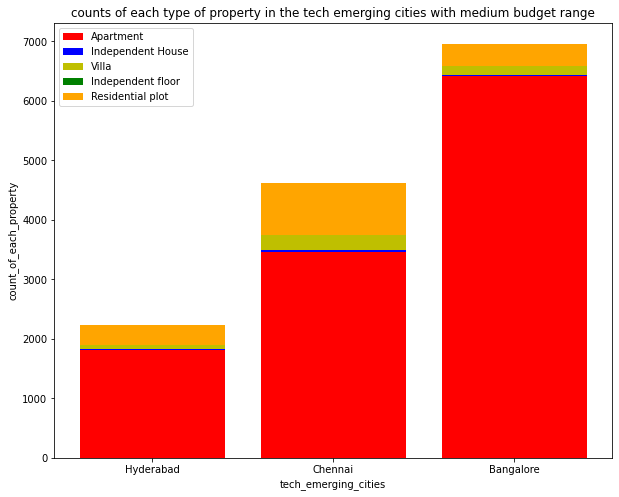

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities with medium budget range")
plt.show()

high range budget(above 1,40,00,000)

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['Price']>=14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


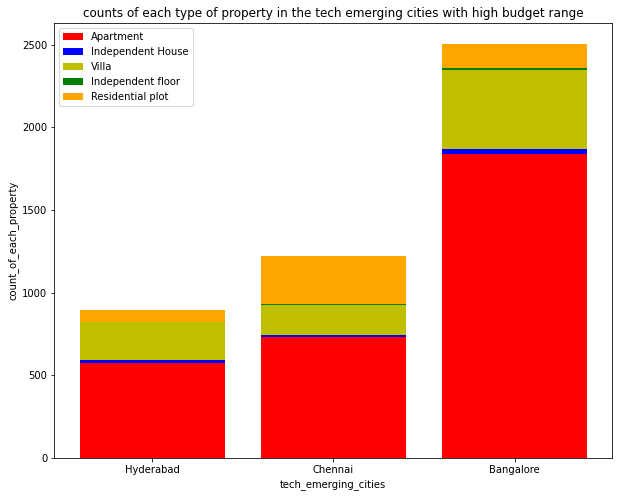

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities with high budget range")
plt.show()

as ready to move dependent of the furnishing status of the property we were giving the visualization of the number of furnished in each city

In [ ]:
df['is_furnished'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

unfurnished

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['is_furnished']>='Unfurnished')]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


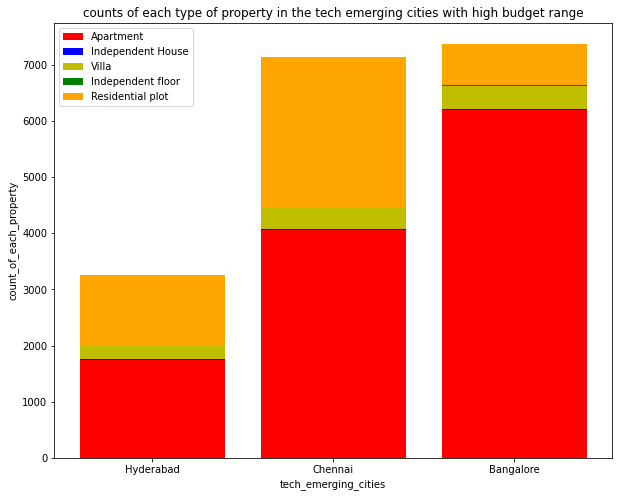

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities with high budget range")
plt.show()

semi-furnished

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['is_furnished']>='Semi-Furnished')]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


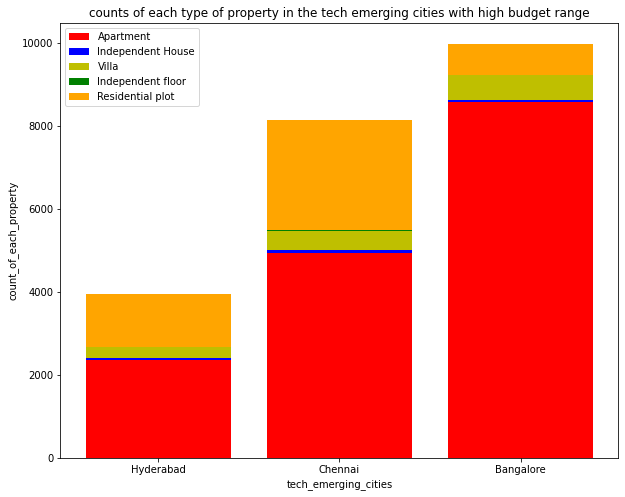

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities with high budget range")
plt.show()

Furnished

In [ ]:
property_types = list(df['Property_type'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in tech_emerging_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['is_ready_to_move']==True) & (df['is_furnished']>='Furnished')]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


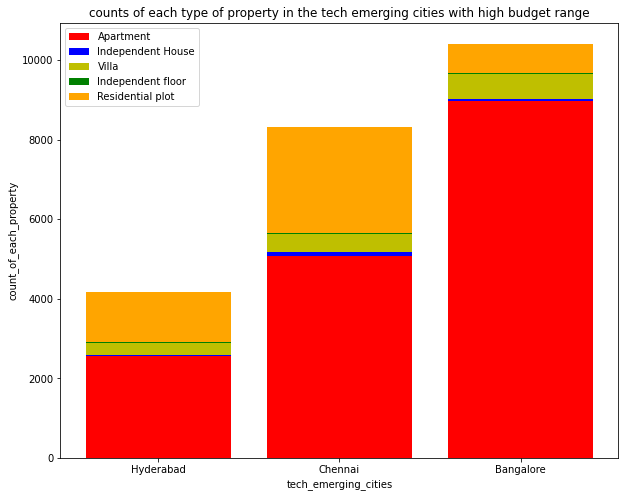

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(tech_emerging_cities, count_type_list[0], color='r')
plt.bar(tech_emerging_cities, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(tech_emerging_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(tech_emerging_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(tech_emerging_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')
plt.xlabel("tech_emerging_cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the tech emerging cities with high budget range")
plt.show()

visualizing each sub urban area of the each city

hyderabad

In [ ]:
df_Sub_urban_names_hyd = list(df[df.City_name=='Hyderabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_hyd:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

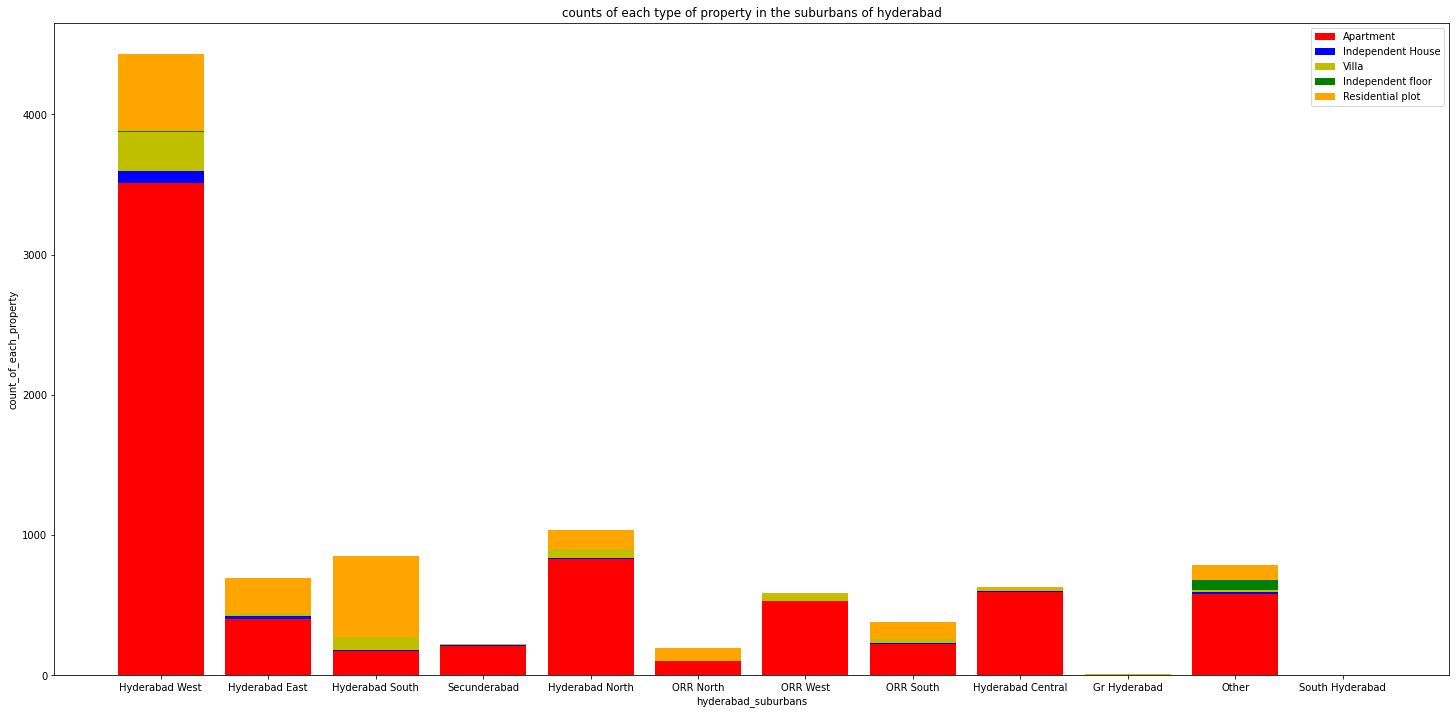

In [ ]:
plt.figure(figsize=(25,12))
plt.bar(df_Sub_urban_names_hyd, count_type_list[0], color='r')
plt.bar(df_Sub_urban_names_hyd, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(df_Sub_urban_names_hyd, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(df_Sub_urban_names_hyd, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(df_Sub_urban_names_hyd, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')

plt.xlabel("hyderabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the suburbans of hyderabad")
plt.show()

Chennai

In [ ]:
df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

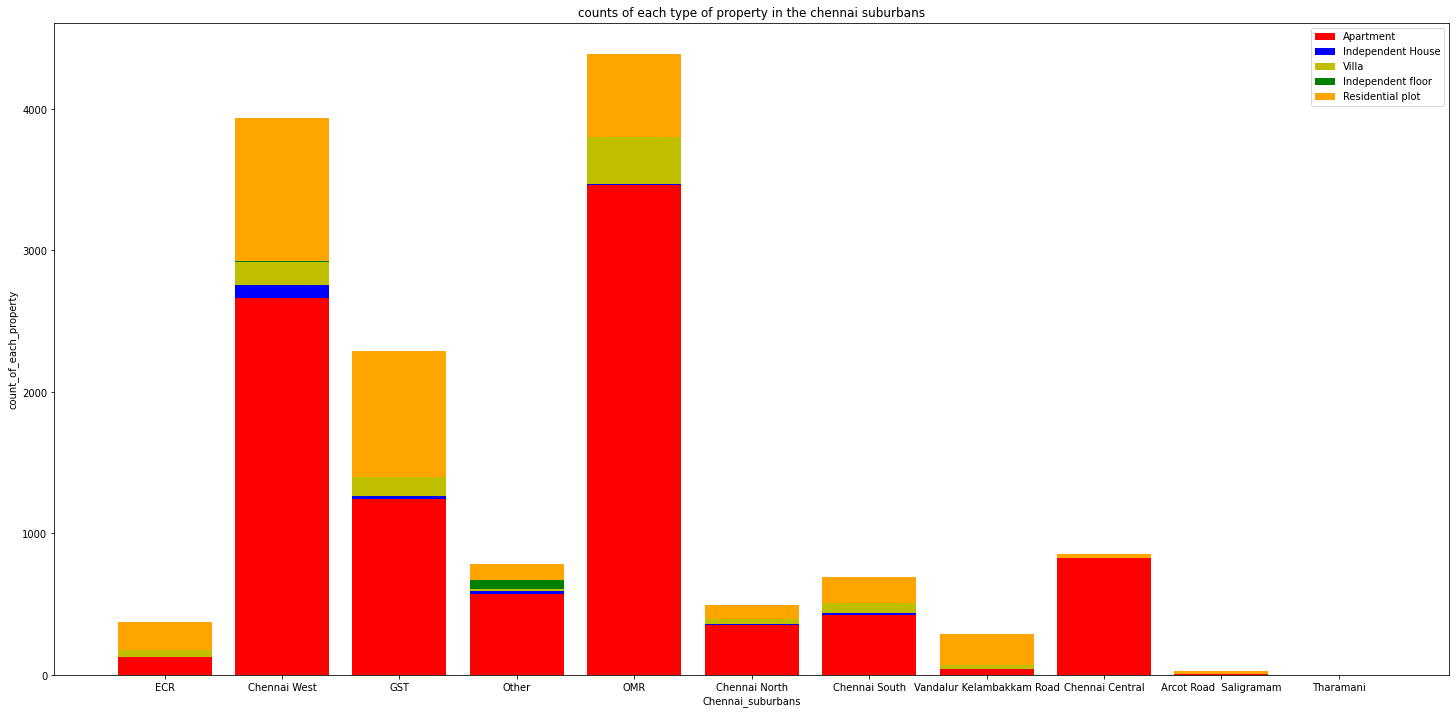

In [ ]:
plt.figure(figsize=(25,12))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='r')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')

plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the chennai suburbans")
plt.show()

Banglore

In [ ]:
df_Sub_urban_names_ban = list(df[df.City_name=='Bangalore']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_ban:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

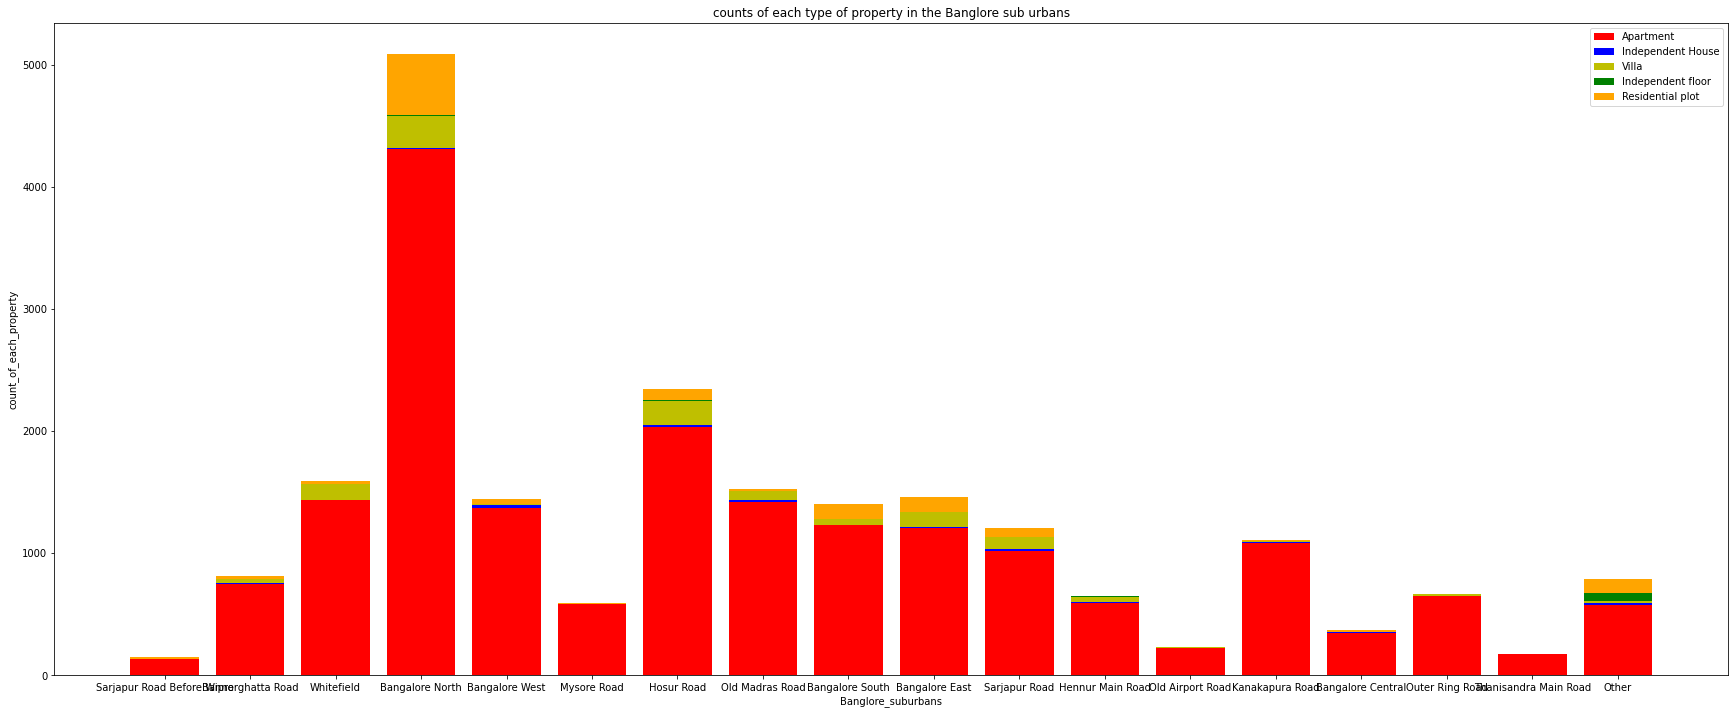

In [ ]:
plt.figure(figsize=(30,12))
plt.bar(df_Sub_urban_names_ban, count_type_list[0], color='r')
plt.bar(df_Sub_urban_names_ban, count_type_list[1], bottom=count_type_list[0], color='b')
plt.bar(df_Sub_urban_names_ban, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='y')
plt.bar(df_Sub_urban_names_ban, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='g')
plt.bar(df_Sub_urban_names_ban, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='orange')

plt.xlabel("Banglore_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Banglore sub urbans")
plt.show()

# insights for large area less budget[LALB](3rd Requirement)

Intuition: for a property to be less budget and large area we require a new attribute which establishes their relation.

So, we created a new column which is ratio of size to the price per unit area.

In [ ]:
#converting into required datatypes 
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

In [ ]:
#creation of the new attribute for the visualisation
df['area_by_price_per_unit'] =  df['Size']/df['Price_per_unit_area']
df['area_by_price'] =  df['Size']/df['Price']

In [ ]:
df['area_by_price_per_unit'].describe()

count    143708.000000
mean          0.224065
std           1.283706
min           0.002240
25%           0.070438
50%           0.142020
75%           0.239735
max         185.185185
Name: area_by_price_per_unit, dtype: float64

we considered that for a property to be categorized as LALB it should be greater than the mean of the ratio of size to priceperunitarea

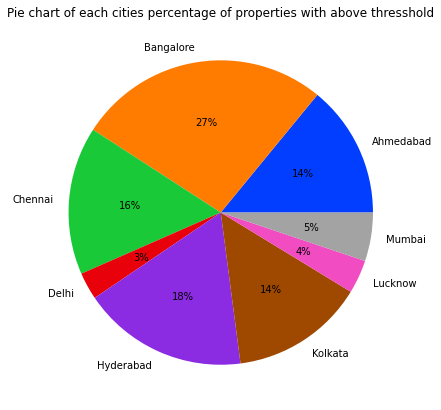

In [ ]:
city_names = list(df['City_name'].unique())

labels = []
counts = []

for i in city_names:
  df_part = df[df.City_name==i]
  labels.append(i)
  counts.append(df_part[df_part.area_by_price_per_unit>=0.224065]['City_name'].count())

colors = sns.color_palette('bright')
plt.figure(figsize=(7,7))
plt.pie(counts,labels =labels,colors=colors,autopct='%.0f%%')
plt.title("Pie chart of each cities percentage of properties with above thresshold")
plt.show()

visualised the distribution of the LALB for each suburban of each city.

In [ ]:
def construct_plots(city,a,b):

  # getting suburban names
  labels_city = []
  counts_city = []
  df_Sub_urban_names = df[df.City_name==city]['Sub_urban_name'].unique()

  for i in list(df_Sub_urban_names):
    df_part = df[df.Sub_urban_name==i]
    labels_city.append(i)
    counts_city.append(df_part[df_part.area_by_price_per_unit>=0.22]['Sub_urban_name'].count())
  return labels_city,counts_city

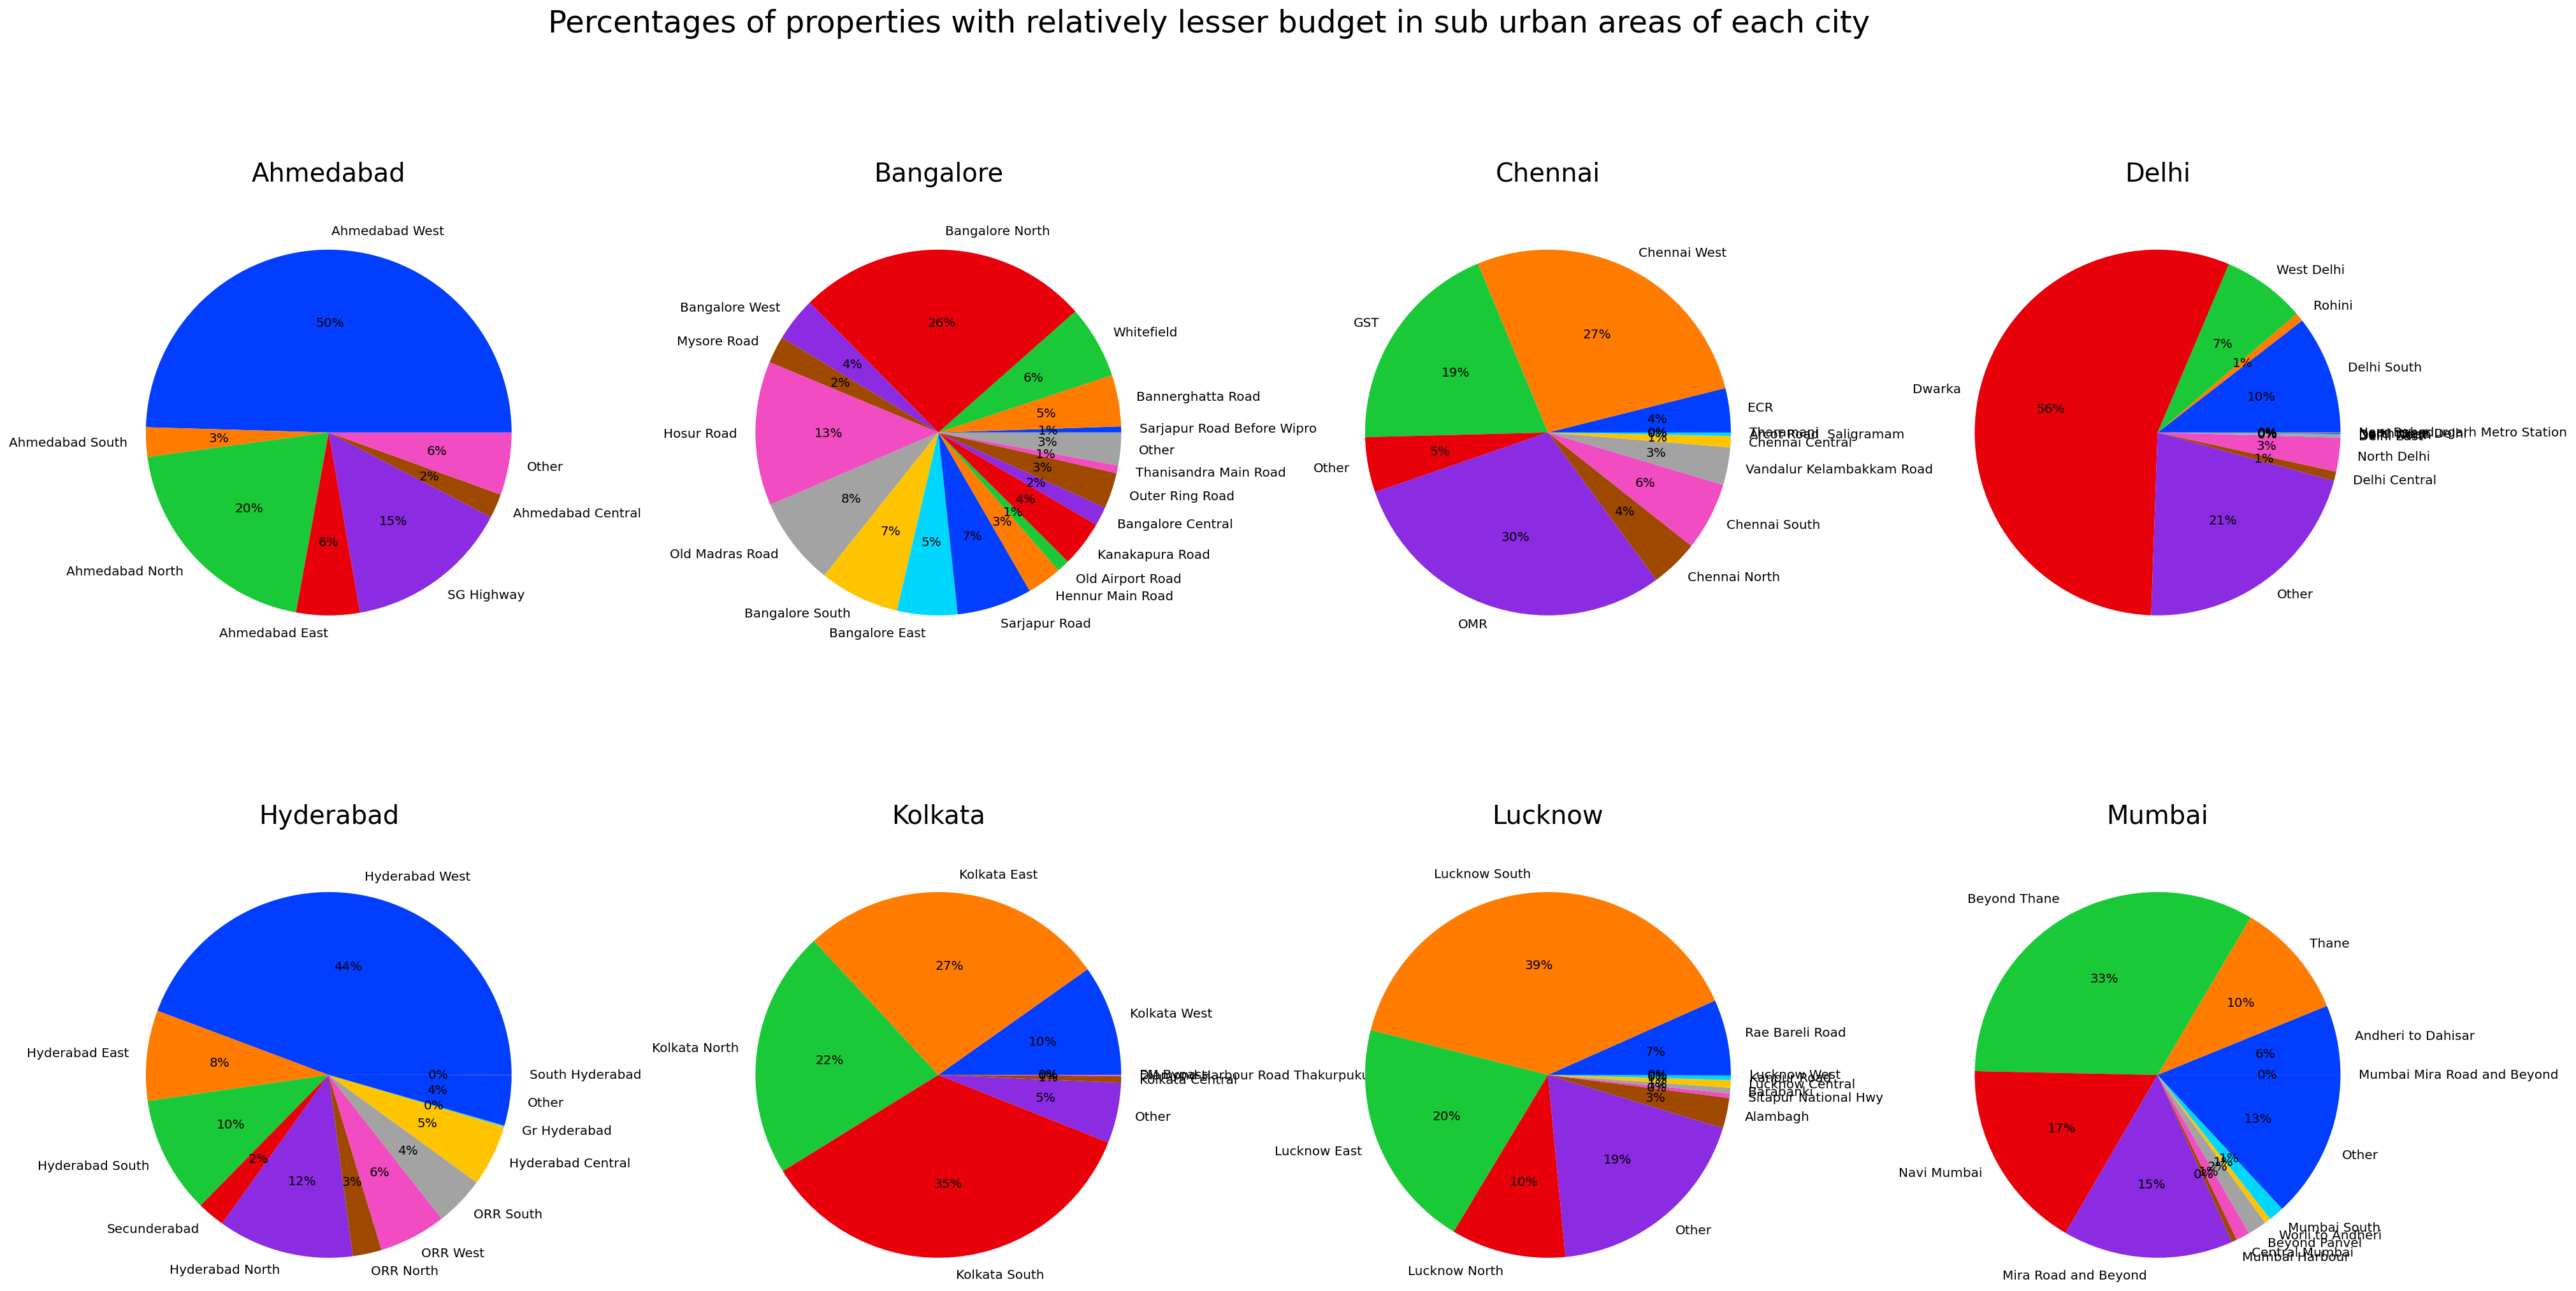

In [ ]:
fig = plt.figure(figsize=(30, 17),dpi=144,constrained_layout= False)


ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)
colors = sns.color_palette('bright')
labels_city,counts_city = construct_plots('Ahmedabad',0,0)
ax1.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax1.set_title("Ahmedabad",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Bangalore',0,1)
ax2.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax2.set_title("Bangalore",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Chennai',0,2)
ax3.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax3.set_title("Chennai",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Delhi',1,0)
ax4.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax4.set_title("Delhi",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Hyderabad',1,1)
ax5.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax5.set_title("Hyderabad",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Kolkata',1,2)
ax6.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax6.set_title("Kolkata",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Lucknow',2,0)
ax7.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax7.set_title("Lucknow",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Mumbai',2,1)
ax8.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax8.set_title("Mumbai",y=1.3 ,fontdict ={'fontsize' : 20})

fig.suptitle("Percentages of properties with relatively lesser budget in sub urban areas of each city",fontsize = 24)
# plt.tight_layout()

plt.subplots_adjust(wspace=1)
plt.show()

visualised the distribution of the LALB of different type of properties for each city

In [ ]:
def construct_plots(city,a,b):

  # getting suburban names
  labels_city = []
  counts_city = []
  df_Sub_urban_names = df[df.City_name==city]['Property_type'].unique()

  for i in list(df_Sub_urban_names):
    df_part = df[df.Property_type==i]
    labels_city.append(i)
    counts_city.append(df_part[df_part.area_by_price_per_unit>=0.22]['Sub_urban_name'].count())
  return labels_city,counts_city

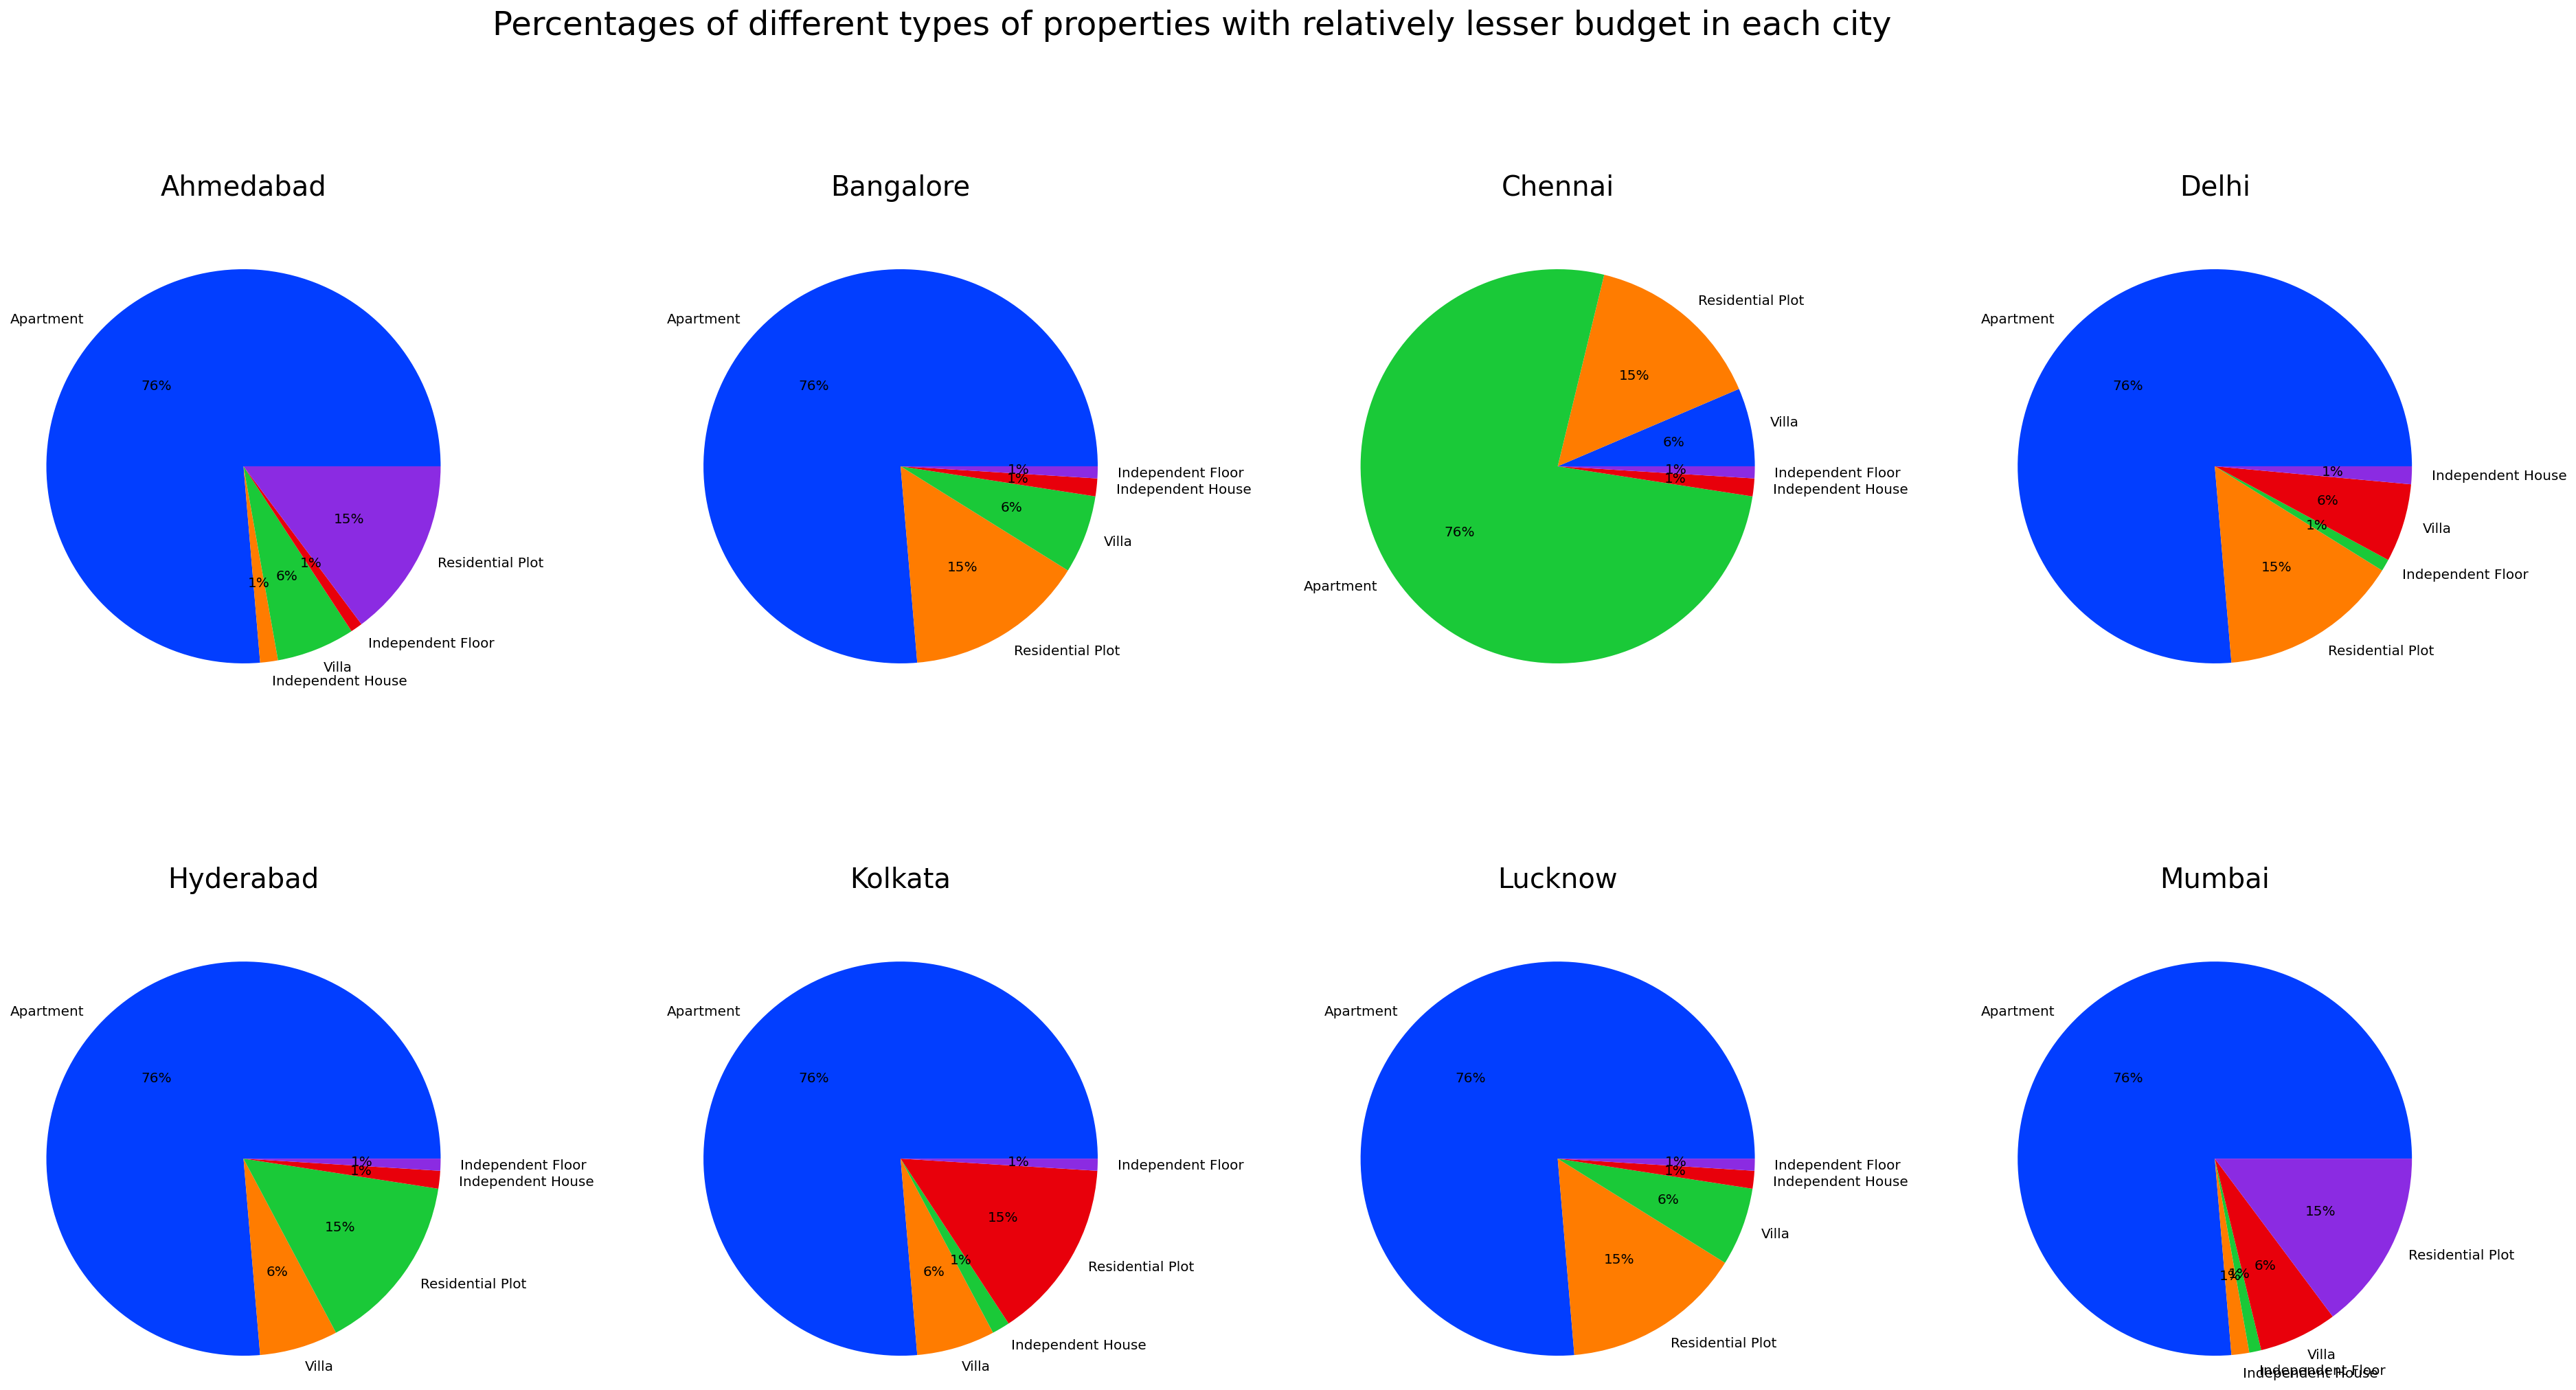

In [ ]:
fig = plt.figure(figsize=(30, 17),dpi=144,constrained_layout= False ,edgecolor='white')


ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)


colors = sns.color_palette('bright')
labels_city,counts_city = construct_plots('Ahmedabad',0,0)
ax1.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax1.set_title("Ahmedabad",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Bangalore',0,1)
ax2.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax2.set_title("Bangalore",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Chennai',0,2)
ax3.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax3.set_title("Chennai",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Delhi',1,0)
ax4.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax4.set_title("Delhi",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Hyderabad',1,1)
ax5.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax5.set_title("Hyderabad",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Kolkata',1,2)
ax6.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax6.set_title("Kolkata",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Lucknow',2,0)
ax7.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax7.set_title("Lucknow",y=1.3 ,fontdict ={'fontsize' : 20})

labels_city,counts_city = construct_plots('Mumbai',2,1)
ax8.pie(counts_city,labels =labels_city,colors=colors,autopct='%.0f%%',radius = 1.5)
ax8.set_title("Mumbai",y=1.3 ,fontdict ={'fontsize' : 20})

fig.suptitle("Percentages of different types of properties with relatively lesser budget in each city",fontsize = 24)
# plt.tight_layout()

plt.subplots_adjust(wspace=1)
plt.show()

# Insights of locality wise(suburbans) across different cities(4th requirement) 

visualizing number of properties in each city with the help of choloropeth maps and stacked bar graphs

In [125]:
lat = []
lon = []
cities = []
count = []

for i in list(df['City_name'].unique()):
  df_part = df[df['City_name']==i]
  lon.append(list(df_part['Longitude'])[0])
  lat.append(list(df_part['Latitude'])[0])
  cities.append(i)
  count.append(df_part['Latitude'].count()/df['Latitude'].count())

In [160]:
property_types = list(df['Property_type'].unique())

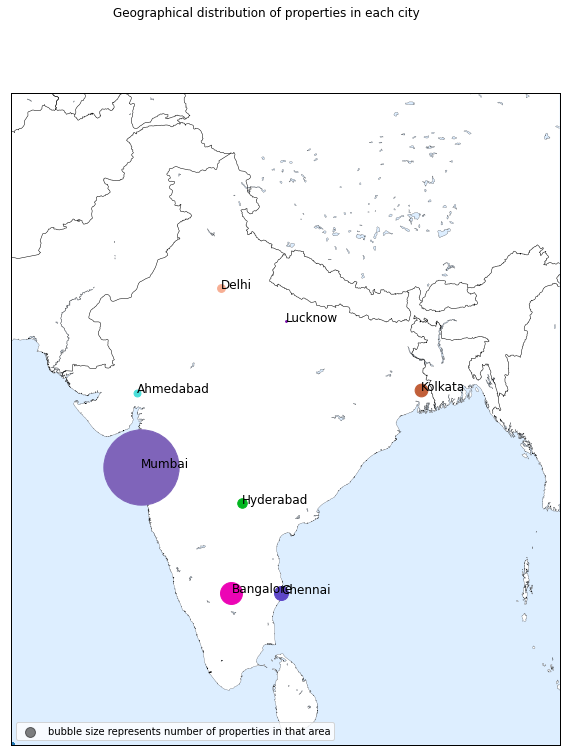

In [127]:
#geographical map
fig = plt.figure(figsize=(21, 12))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()
m.scatter(lon,lat)
import random

for i in range(8):
  x, y = m(lon[i],lat[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count[i]*150,color=col)
  plt.text(x+25, y+25, cities[i], fontsize=12);

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')


fig.suptitle("Geographical distribution of properties in each city", fontsize=12)
plt.show()

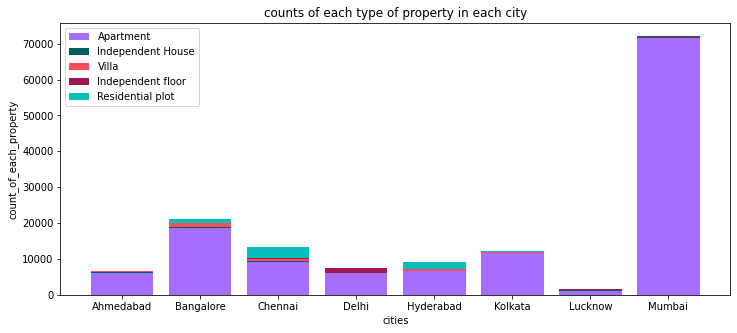

In [128]:
#bar graphs
df_cities = list(df.City_name.unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_cities, count_type_list[0], color='#a56eff')
plt.bar(df_cities, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_cities, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_cities, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in each city")
plt.show()

Visualising number of properties in the localities(suburbans) and the each type of property for each city

Mumbai

In [130]:
# getting localities from Mumbai

localities = list(df[df['City_name'] == 'Mumbai']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Mumbai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


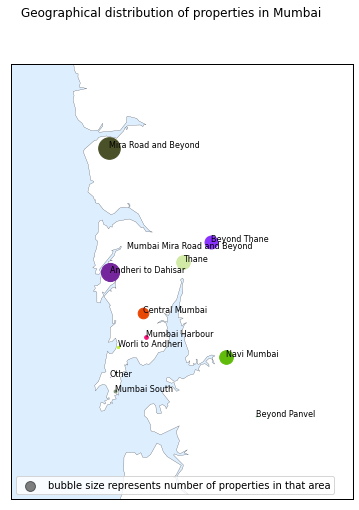

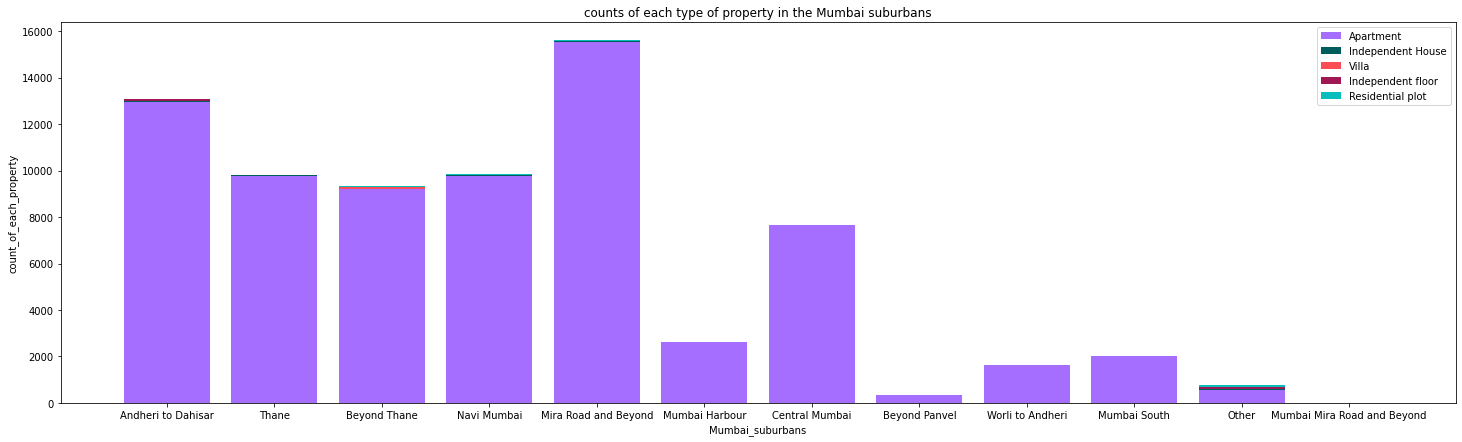

In [131]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.2,llcrnrlat=min(lat_localities)-0.2,urcrnrlon=max(long_localities)+0.2,urcrnrlat=max(lat_localities)+0.2,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Mumbai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Mumbai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,7))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Mumbai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Mumbai suburbans",fontdict = {'fontsize':12})
plt.show()

visulisation of each property type of each suburban in the respective budget range

Low Budget Range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


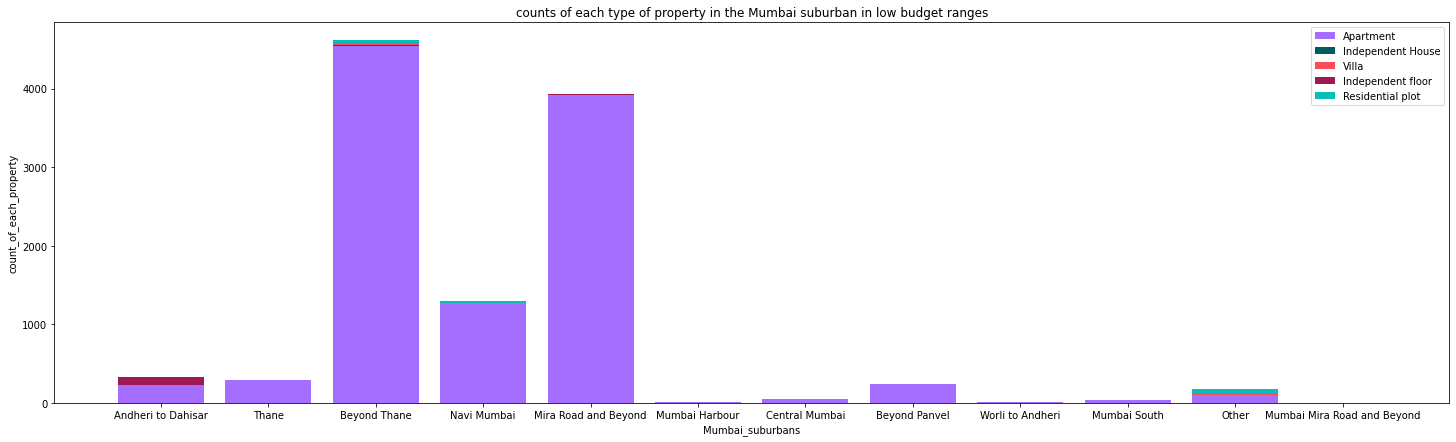

In [162]:
df_Sub_urban_names_che = list(df[df.City_name=='Mumbai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df["Price"]<=4300000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,7))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Mumbai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Mumbai suburban in low budget range",fontdict = {'fontsize':12})
plt.show()

Medium Budget Range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


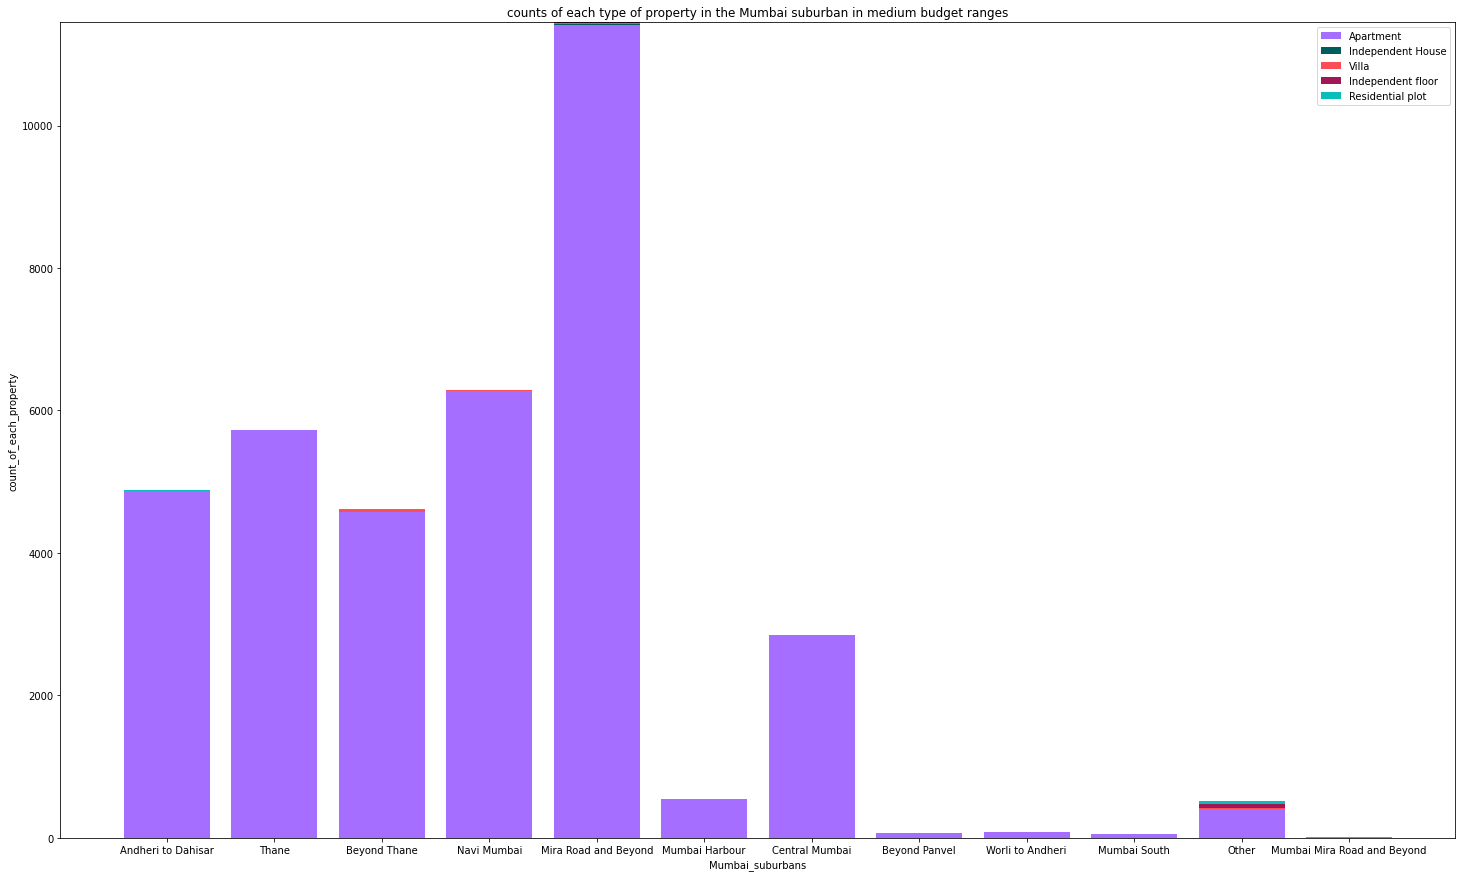

In [165]:
df_Sub_urban_names_che = list(df[df.City_name=='Mumbai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df["Price"]<=14000000) & (df["Price"]>4300000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,15))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Mumbai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Mumbai suburban in medium budget ranges",fontdict = {'fontsize':12})
plt.show()

High Budget Range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


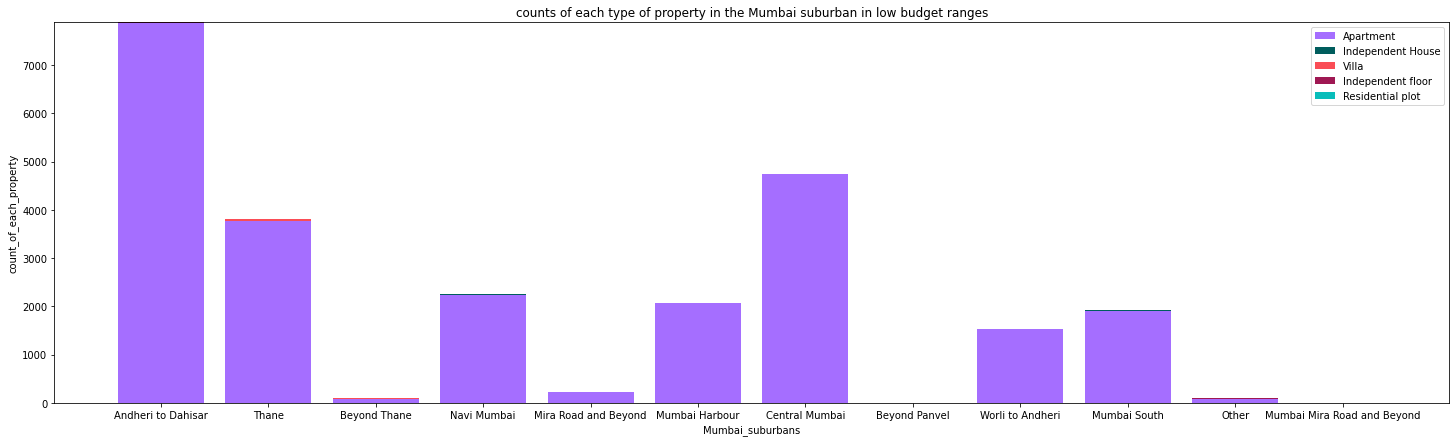

In [166]:
df_Sub_urban_names_che = list(df[df.City_name=='Mumbai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df["Price"]>14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,7))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Mumbai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Mumbai suburban in high budget ranges",fontdict = {'fontsize':12})
plt.show()

chennai

In [132]:
# getting localities from Chennai

localities = list(df[df['City_name'] == 'Chennai']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Chennai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


In [133]:
lat_localities[-1] = 12.59
long_localities[-1] = 80.14
lat_localities[-2] = 13.02
long_localities[-2] = 80.12

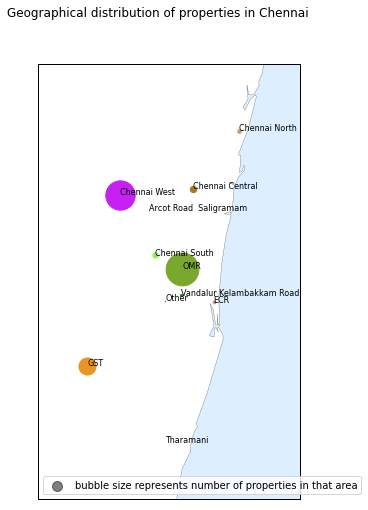

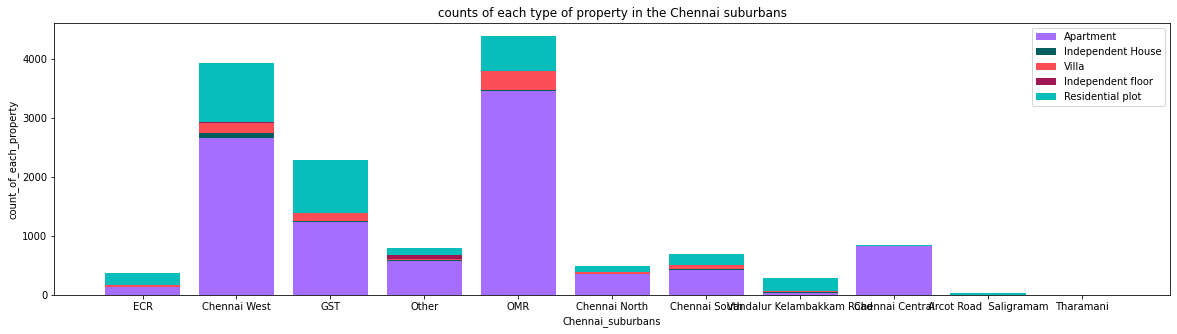

In [134]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.12,urcrnrlat=max(lat_localities)+0.12,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Chennai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Chennai suburbans",fontdict = {'fontsize':12})
plt.show()

Kolkata

In [135]:
# getting localities from Kolkata

localities = list(df[df['City_name'] == 'Kolkata']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Kolkata']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


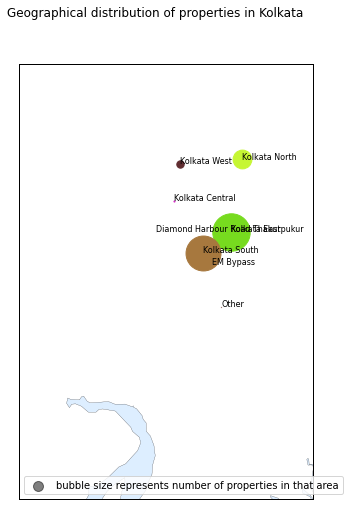

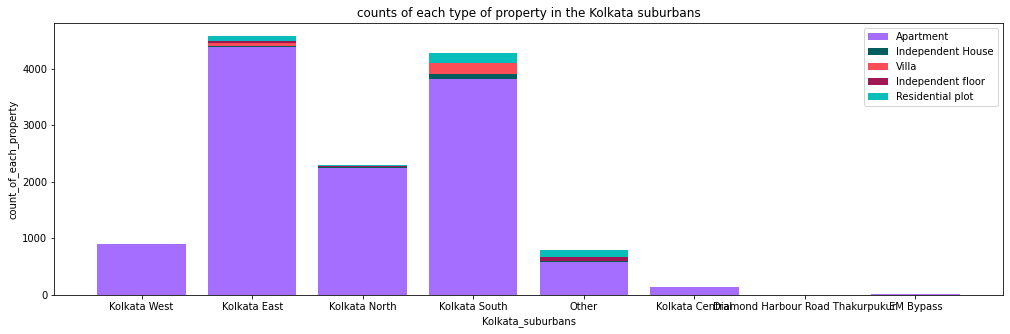

In [136]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.4,llcrnrlat=min(lat_localities)-0.4,urcrnrlon=max(long_localities)+0.2,urcrnrlat=max(lat_localities)+0.2,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Kolkata", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Kolkata']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(17,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Kolkata_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Kolkata suburbans",fontdict = {'fontsize':12})
plt.show()

Ahmedabad

In [137]:
# getting localities from Ahmedabad

localities = list(df[df['City_name'] == 'Ahmedabad']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Ahmedabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


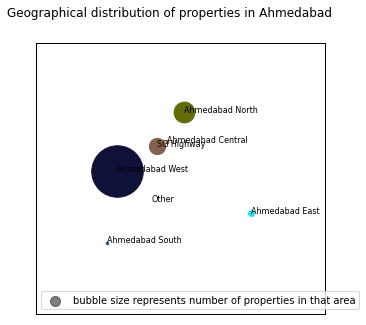

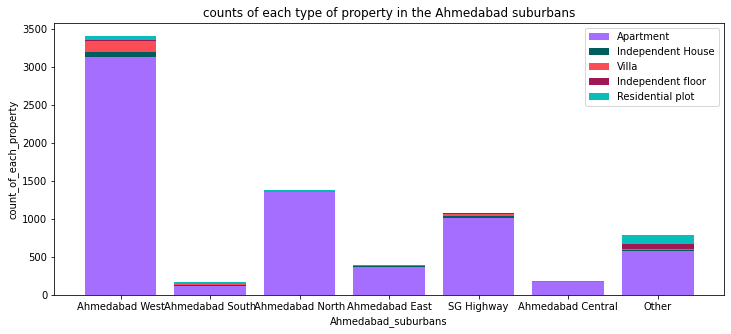

In [138]:
fig = plt.figure(figsize=(12, 5))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)

fig.suptitle("Geographical distribution of properties in Ahmedabad", fontsize=12)
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Ahmedabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Ahmedabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Ahmedabad suburbans")
plt.show()

Banglore

In [139]:
# getting localities from Bangalore

localities = list(df[df['City_name'] == 'Bangalore']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Bangalore']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


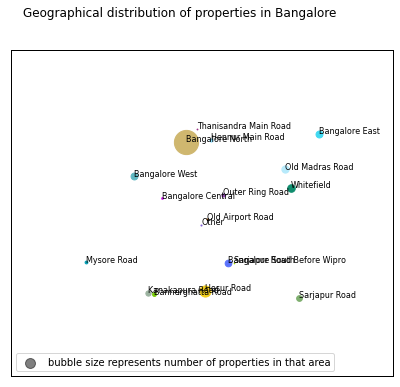

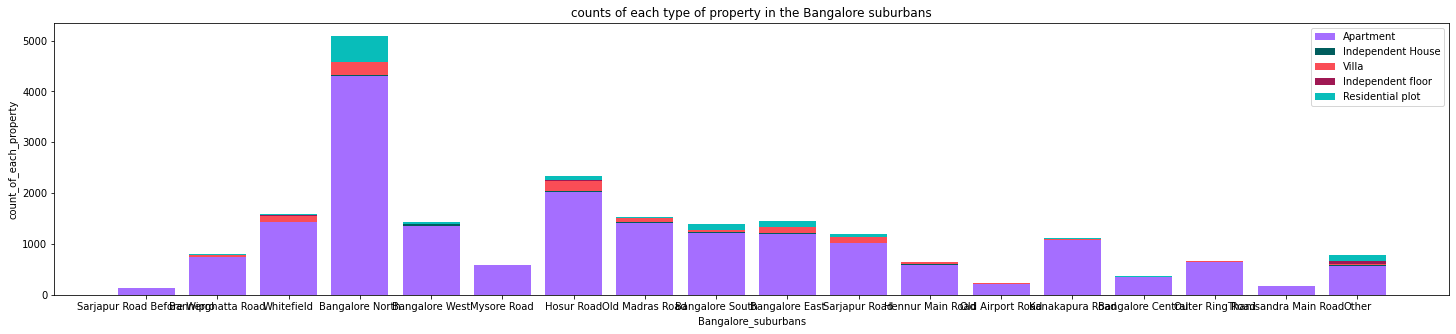

In [140]:
fig = plt.figure(figsize=(25, 6))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8);


fig.suptitle("Geographical distribution of properties in Bangalore", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Bangalore']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Bangalore_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Bangalore suburbans",fontdict = {'fontsize':12})
plt.show()

Delhi

In [141]:
# getting localities from Delhi

localities = list(df[df['City_name'] == 'Delhi']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Delhi']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


In [142]:
lat_localities[2] = 28.40
long_localities[2] = 77.04
lat_localities[-2] = 28.43
long_localities[-2] = 77.04
lat_localities[-5] = 28.37
long_localities[-5] = 78.17

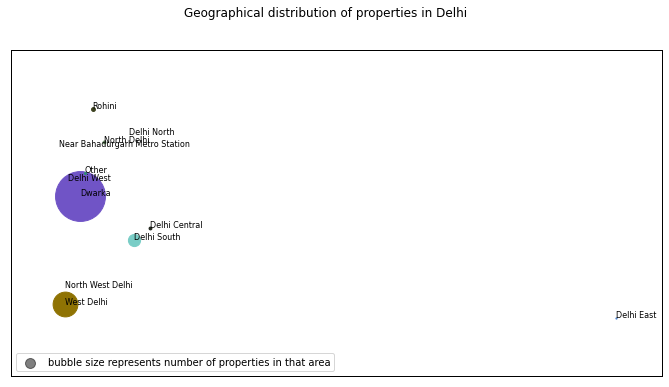

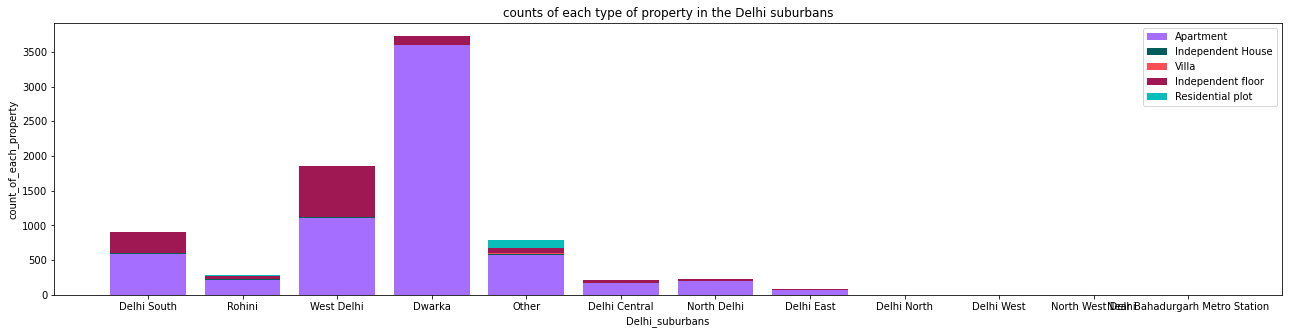

In [143]:
fig = plt.figure(figsize=(12, 6))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8);

fig.suptitle("Geographical distribution of properties in Delhi", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Delhi']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(22,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Delhi_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Delhi suburbans",fontdict = {'fontsize':12})
plt.show()

Hyderabad

In [144]:
# getting localities from Hyderabad

localities = list(df[df['City_name'] == 'Hyderabad']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Hyderabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


In [145]:
lat_localities[-1] = 17.14
long_localities[-1] = 78.29

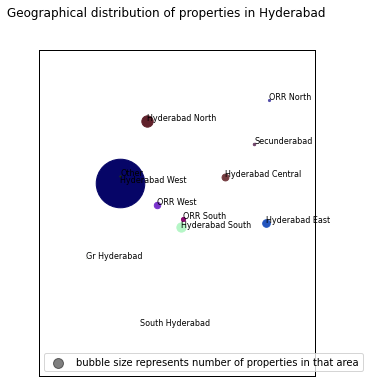

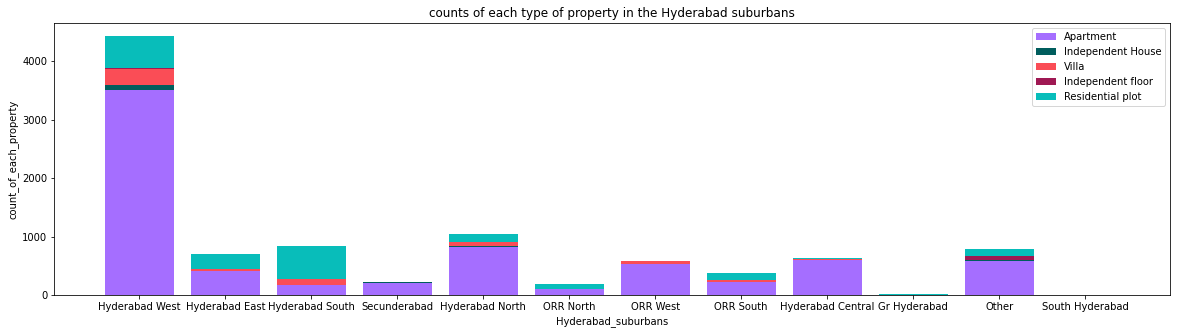

In [146]:
fig = plt.figure(figsize=(12, 6))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Hyderabad", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Hyderabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Hyderabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Hyderabad suburbans",fontdict = {'fontsize':12})
plt.show()

Lucknow

In [147]:
# getting localities from Lucknow

localities = list(df[df['City_name'] == 'Lucknow']['Sub_urban_name'].unique())
df_localities = df[df['City_name'] == 'Lucknow']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Sub_urban_name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


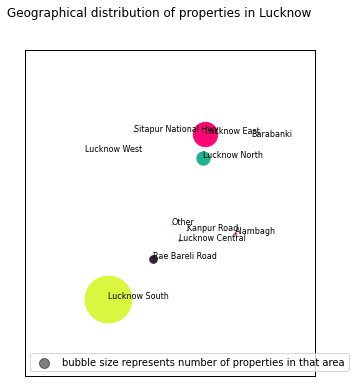

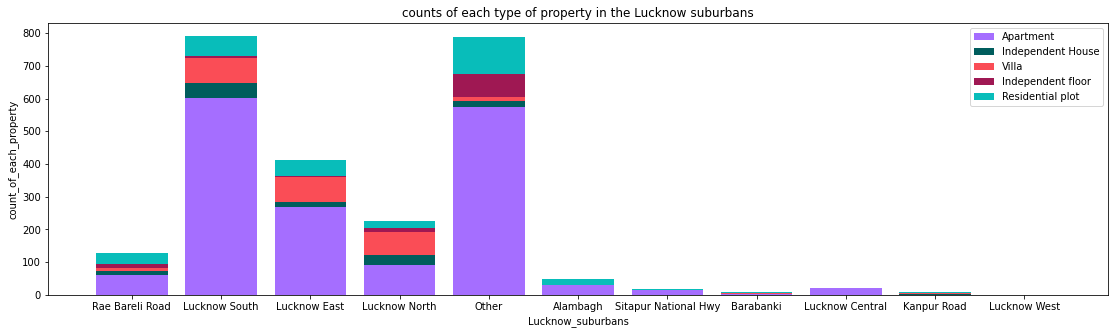

In [148]:
fig = plt.figure(figsize=(12, 6))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)



fig.suptitle("Geographical distribution of properties in Lucknow", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Lucknow']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(19,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Lucknow_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Lucknow suburbans",fontdict = {'fontsize':12})
plt.show()

# Insights for hotspots for offices in ahmedabad and Mumbai

We considered all other property types except villa for the hotspot identication.And we also handled residential plot as different entity as there will be extra cost for the investor to construct the building for office.  

we defined hotspots with two different conditions


1)If studio present in an particular locality it can be considered as hotspot 

2)If price was in the medium budget range, the place with high number of properties in the particular Locality


we visualized and presented the above two conditions for both the cities as whole and also for the each locality(sub_urban) of each city.

In [ ]:
lat = []
lon = []
cities = ['Ahmedabad','Mumbai']
count = []

for i in cities:
  df_part = df[(df['City_name']==i) & (df['is_studio']==True) & (df['Property_type']!='Residential Plot') & (df['Property_type']!='Villa') ]
  lon.append(list(df_part['Longitude'])[0])
  lat.append(list(df_part['Latitude'])[0])
  count.append(df_part['Latitude'].count()/df['Latitude'].count())

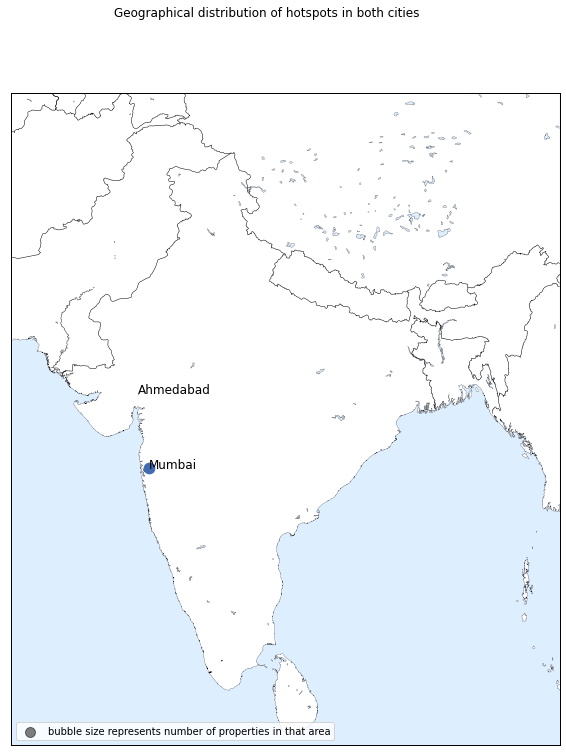

In [ ]:
fig = plt.figure(figsize=(21, 12))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(2):
  x, y = m(lon[i],lat[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count[i]*1500,color=col)
  plt.text(x+25, y+25, cities[i], fontsize=12);
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left');
fig.suptitle("Geographical distribution of hotspots in both cities", fontsize=12)
plt.show()

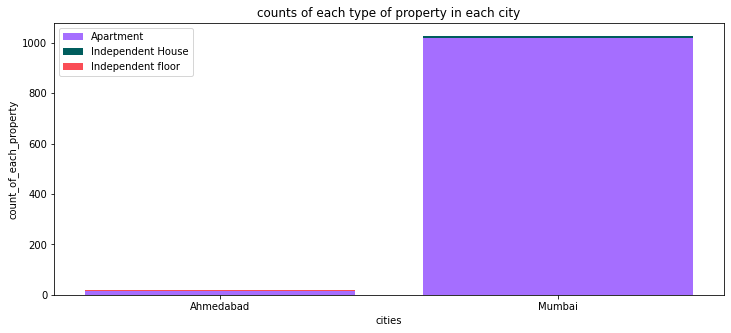

In [ ]:
df_cities = cities
property_types = ['Apartment', 'Independent House', 'Independent Floor',]
counts_type_list = [[] for i in range(len(property_types))]
for i in df_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['is_studio']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_cities, count_type_list[0], color='#a56eff')
plt.bar(df_cities, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')


plt.xlabel("cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Independent floor"])
plt.title("counts of each type of property in each city")
plt.show()

In [ ]:
lat = []
lon = []
cities = ['Ahmedabad','Mumbai']
count = []

for i in cities:
  df_part = df[(df['City_name']==i) & (df['Price']<=14000000) & (df['Price']>4300000) & (df['Property_type']!='Residential Plot') & (df['Property_type']!='Villa') ]
  lon.append(list(df_part['Longitude'])[0])
  lat.append(list(df_part['Latitude'])[0])
  count.append(df_part['Latitude'].count()/df['Latitude'].count())

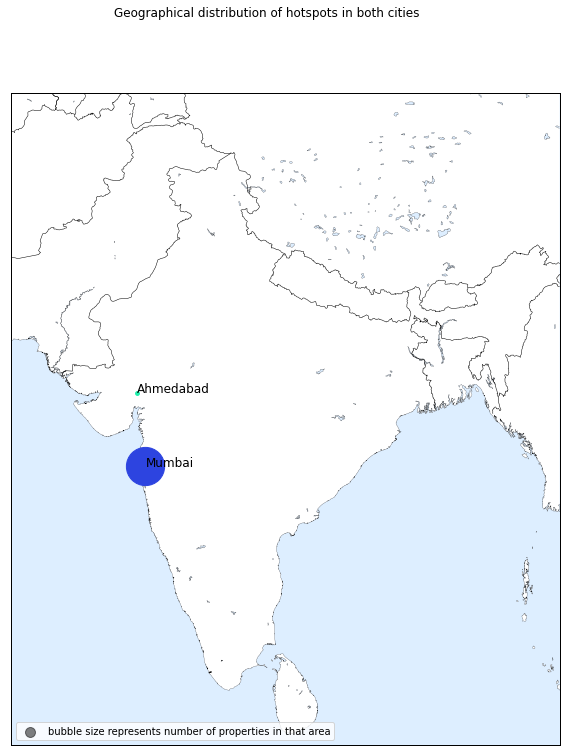

In [ ]:
fig = plt.figure(figsize=(21, 12))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(2):
  x, y = m(lon[i],lat[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count[i]*150,color=col)
  plt.text(x+25, y+25, cities[i], fontsize=12);
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left');
fig.suptitle("Geographical distribution of hotspots in both cities", fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


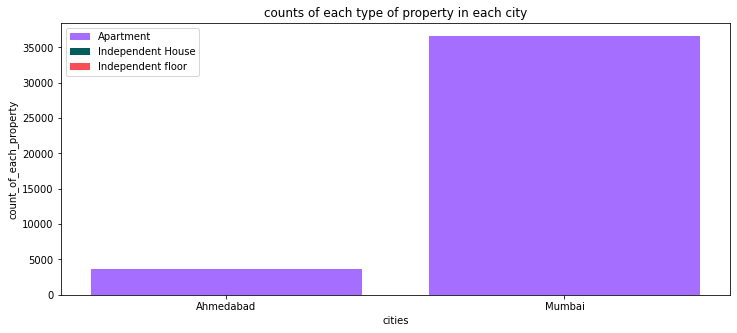

In [ ]:
df_cities = cities
property_types = ['Apartment', 'Independent House', 'Independent Floor']
counts_type_list = [[] for i in range(len(property_types))]
for i in df_cities:
  df_part = df[df['City_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df['Price']<=14000000) & (df['Price']>4300000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_cities, count_type_list[0], color='#a56eff')
plt.bar(df_cities, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_cities, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')


plt.xlabel("cities")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Independent floor"])
plt.title("counts of each type of property in each city")
plt.show()

In [ ]:
df_part.shape

(0, 34)

In [ ]:
# getting localities from Ahmedabad

localities = list(df[df['City_name'] == 'Ahmedabad']['Sub_urban_name'].unique())
df_localities_ahm = df[df['City_name'] == 'Ahmedabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_ahm[(df_localities_ahm['Sub_urban_name'] == locality) & (df_localities_ahm['is_studio']==True)]
  if df_part.shape != (0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_ahm['Latitude'].count())


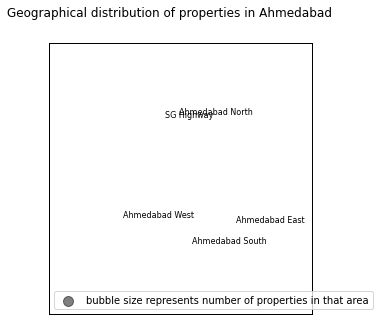

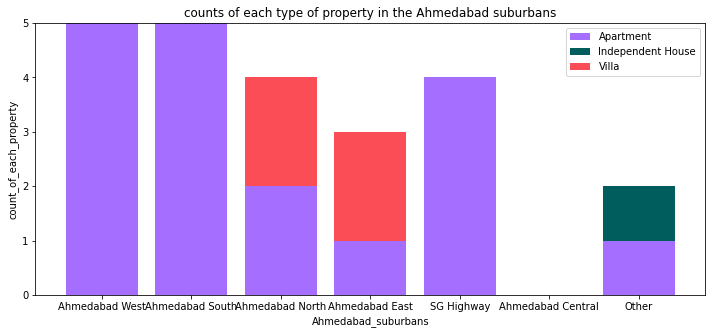

In [ ]:
fig = plt.figure(figsize=(12, 5))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)

fig.suptitle("Geographical distribution of properties in Ahmedabad", fontsize=12)
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Ahmedabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['is_studio']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')

plt.xlabel("Ahmedabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House","Independent floor"])
plt.title("counts of each type of property in the Ahmedabad suburbans")
plt.show()

In [ ]:
# getting localities from Chennai

localities = list(df[df['City_name'] == 'Chennai']['Sub_urban_name'].unique())
df_localities_che = df[df['City_name'] == 'Chennai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_che[(df_localities_che['Sub_urban_name'] == locality) & (df_localities_che['is_studio']==True)]
  if df_part.shape!=(0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_che['Latitude'].count())


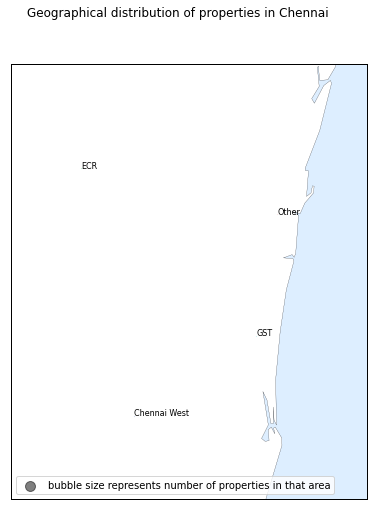

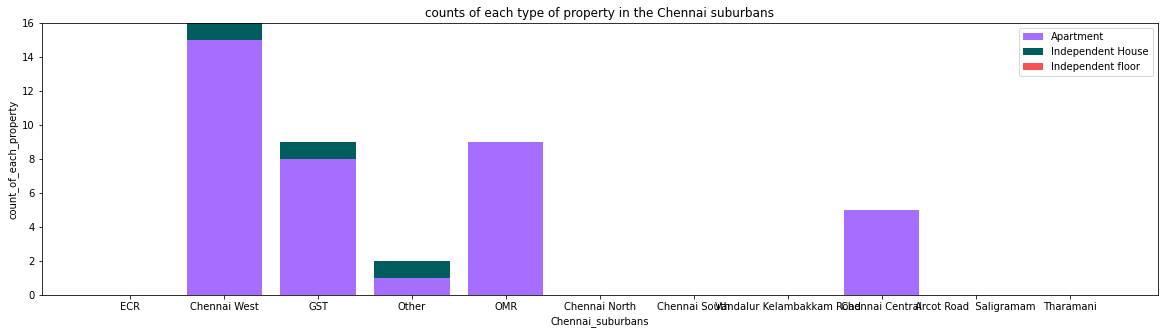

In [ ]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.12,urcrnrlat=max(lat_localities)+0.12,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Chennai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['is_studio']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')


plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Independent floor"])
plt.title("counts of each type of property in the Chennai suburbans",fontdict = {'fontsize':12})
plt.show()

In [ ]:
# getting localities from Ahmedabad

localities = list(df[df['City_name'] == 'Ahmedabad']['Sub_urban_name'].unique())
df_localities_ahm = df[df['City_name'] == 'Ahmedabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_ahm[(df_localities_ahm['Sub_urban_name'] == locality) &  (df_localities_ahm['Price']<=14000000) & (df_localities_ahm['Price']>4300000)]
  if df_part.shape != (0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_ahm['Latitude'].count())


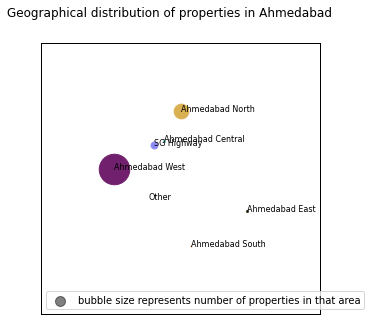

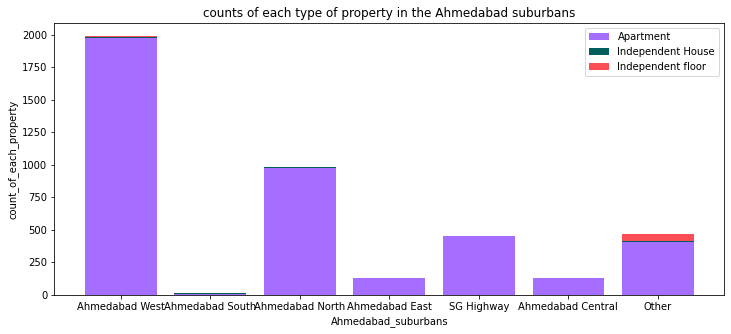

In [ ]:
fig = plt.figure(figsize=(12, 5))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)

fig.suptitle("Geographical distribution of properties in Ahmedabad", fontsize=12)
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Ahmedabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['Price']>=4300000) & (df_part['Price']<=14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')

plt.xlabel("Ahmedabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House","Independent floor"])
plt.title("counts of each type of property in the Ahmedabad suburbans")
plt.show()

In [ ]:
# getting localities from Chennai

localities = list(df[df['City_name'] == 'Chennai']['Sub_urban_name'].unique())
df_localities_che = df[df['City_name'] == 'Chennai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_che[(df_localities_che['Sub_urban_name'] == locality) & (df_localities_che['Price']>=4300000) & (df_localities_che['Price']<=14000000)]
  if df_part.shape!=(0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_che['Latitude'].count())


In [ ]:
lat_localities[-1] = 12.59
long_localities[-1] = 80.14
lat_localities[-2] = 13.02
long_localities[-2] = 80.12

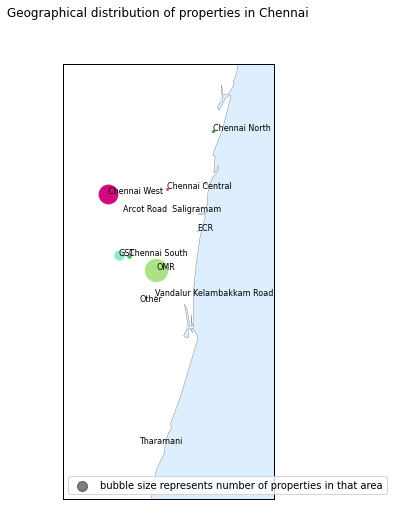

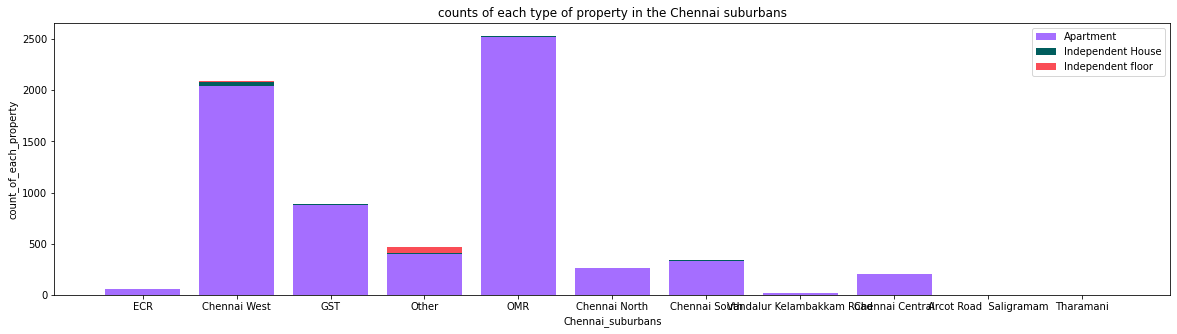

In [ ]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.12,urcrnrlat=max(lat_localities)+0.12,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Chennai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['Price']>4300000) & (df_part['Price']<=14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')


plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Independent floor"])
plt.title("counts of each type of property in the Chennai suburbans",fontdict = {'fontsize':12})
plt.show()

In [ ]:
# getting localities from Ahmedabad

localities = list(df[df['City_name'] == 'Ahmedabad']['Sub_urban_name'].unique())
df_localities_ahm = df[df['City_name'] == 'Ahmedabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_ahm[(df_localities_ahm['Sub_urban_name'] == locality) &  (df_localities_ahm['Price']<=14000000) & (df_localities_ahm['Price']>4300000)]
  if df_part.shape != (0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_ahm['Latitude'].count())


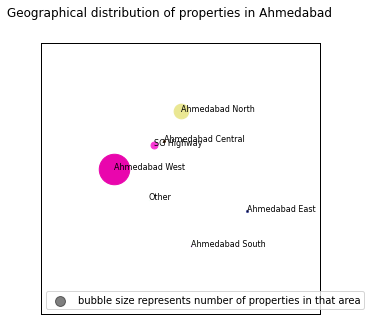

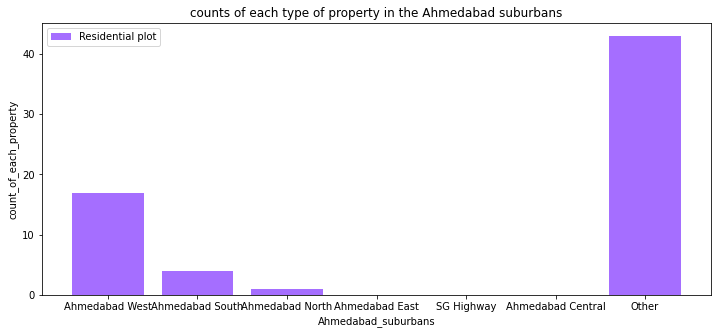

In [ ]:
fig = plt.figure(figsize=(12, 5))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)

fig.suptitle("Geographical distribution of properties in Ahmedabad", fontsize=12)
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Ahmedabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['Price']>=4300000) & (df_part['Price']<=14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')


plt.xlabel("Ahmedabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Residential plot"])
plt.title("counts of each type of property in the Ahmedabad suburbans")
plt.show()

In [ ]:
# getting localities from Chennai

localities = list(df[df['City_name'] == 'Chennai']['Sub_urban_name'].unique())
df_localities_che = df[df['City_name'] == 'Chennai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_che[(df_localities_che['Sub_urban_name'] == locality) & (df_localities_che['Price']>=4300000) & (df_localities_che['Price']<=14000000)]
  if df_part.shape!=(0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_che['Latitude'].count())


In [ ]:
lat_localities[-1] = 12.59
long_localities[-1] = 80.14
lat_localities[-2] = 13.02
long_localities[-2] = 80.12

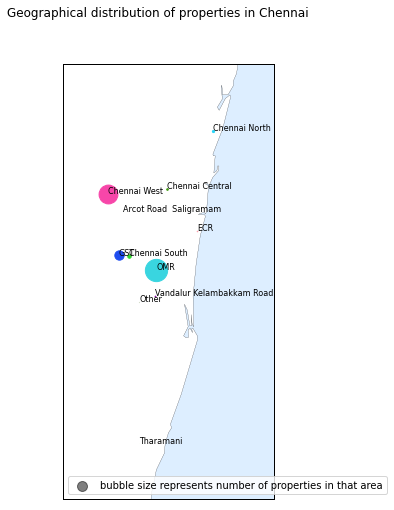

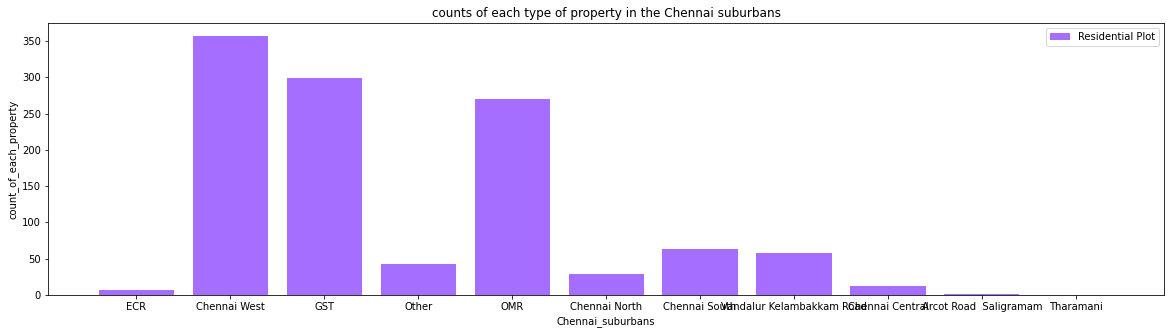

In [ ]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.12,urcrnrlat=max(lat_localities)+0.12,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Chennai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['Price']>4300000) & (df_part['Price']<=14000000)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')



plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Residential Plot"])
plt.title("counts of each type of property in the Chennai suburbans",fontdict = {'fontsize':12})
plt.show()

# Reason for choosing the above visualisation techiniques

For the whole assignment we followed a path of visulalising in which we started at the basic level of visualisation for the first requirement and more complex one for the last requirement.The general idea of ours is to cover all the spectras of the data visualisation with the given data and tasks.

For requirement 1:
  
  we used histograms as the data is contionuous and the box plot will be suitable as we have to find out the ranges

For requirement 2:

  we used stacked bar graphs as there were different property types and we just required their count so the bar graphs are more suitable.

For requirement 3:

  we used pie charts since the relativity is represented more accurately in the percentages.

For requirement 4:

  As the discussion is about the localities we tried to visualise geographically for which we plotted the scatter plot on the geographical map as we have latitude and longitude co-ordinates.We also visualised the data in the stacked bar graphs for the exact count of the above visualisation

For requirement 5:

  For hotspot identification the geogrpahical visualisation can provide better appeal for which we did the same as above where we plotted the scatter plot on the geographical map as we have latitude and longitude co-ordinates.We also visualised the data in the stacked bar graphs for the exact count of the above visualisation.

# Failed Visualisations

for the 3rd requirement price per unit area gives us accurate information than the price

In [ ]:
#one failure
df['area_by_price'].describe()

count    143708.000000
mean          0.000156
std           0.000207
min           0.000006
25%           0.000075
50%           0.000126
75%           0.000190
max           0.009600
Name: area_by_price, dtype: float64

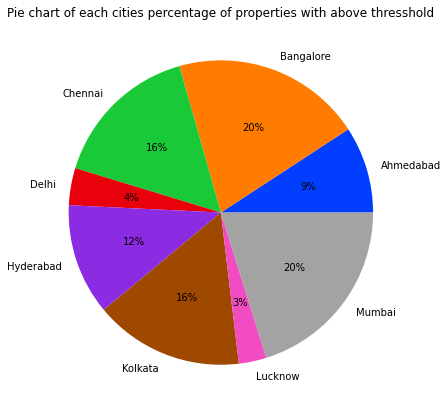

In [ ]:
city_names = list(df['City_name'].unique())

labels = []
counts = []

for i in city_names:
  df_part = df[df.City_name==i]
  labels.append(i)
  counts.append(df_part[df_part.area_by_price>=0.000156]['City_name'].count())

colors = sns.color_palette('bright')
plt.figure(figsize=(7,7))
plt.pie(counts,labels =labels,colors=colors,autopct='%.0f%%')
plt.title("Pie chart of each cities percentage of properties with above thresshold")
plt.show()

For 5th requirement there were no residential plots as studios

In [ ]:
# getting localities from Ahmedabad

localities = list(df[df['City_name'] == 'Ahmedabad']['Sub_urban_name'].unique())
df_localities_ahm = df[df['City_name'] == 'Ahmedabad']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_ahm[(df_localities_ahm['Sub_urban_name'] == locality) & (df_localities_ahm['is_studio']==True) & (df_localities_ahm['Property_type']=='Residential Plot')]
  if df_part.shape != (0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_ahm['Latitude'].count())


In [ ]:
fig = plt.figure(figsize=(12, 5))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.1,urcrnrlat=max(lat_localities)+0.1,
            lat_0=28, lon_0=77)
#m.etopo(scale=0.5, alpha=0.5)
m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)

fig.suptitle("Geographical distribution of properties in Ahmedabad", fontsize=12)
plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Ahmedabad']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['is_studio']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(12,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')


plt.xlabel("Ahmedabad_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Residential Plot"])
plt.title("counts of each type of property in the Ahmedabad suburbans")
plt.show()

In [ ]:
# getting localities from Chennai

localities = list(df[df['City_name'] == 'Chennai']['Sub_urban_name'].unique())
df_localities_che = df[df['City_name'] == 'Chennai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities_che[(df_localities_che['Sub_urban_name'] == locality) & (df_localities_che['is_studio']==True) & (df_localities_che['Property_type'])]
  if df_part.shape!=(0,34):
    lat_localities.append(list(df_part['Latitude'])[0])
    long_localities.append(list(df_part['Longitude'])[0])
    count_localities.append(df_part['Latitude'].count()/df_localities_che['Latitude'].count())


In [ ]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.1,llcrnrlat=min(lat_localities)-0.1,urcrnrlon=max(long_localities)+0.12,urcrnrlat=max(lat_localities)+0.12,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Chennai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Chennai']['Sub_urban_name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Sub_urban_name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[(df_part['Property_type']==property_types[j]) & (df_part['is_studio']==True)]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(20,5))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')



plt.xlabel("Chennai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Independent floor"])
plt.title("counts of each type of property in the Chennai suburbans",fontdict = {'fontsize':12})
plt.show()

For 5th requirement we also thought of using listing domain score as the indicator of the hotspot but 99% of the data have score of 4 which will be not useful

In [167]:
df['listing_domain_score'].unique()

array([4.     , 4.82143, 4.46429, 7.14286, 4.5283 , 5.17857, 5.     ,
       4.64286, 8.39286, 8.7104 , 8.21692, 8.45764, 8.03835, 8.17469,
       4.28571, 4.10714, 7.71576, 5.81818])

In [168]:
for i in list(df['listing_domain_score'].unique()):
  print(i,":",df[df['listing_domain_score']==i]['City_name'].count())

4.0 : 142873
4.82143 : 218
4.46429 : 340
7.14286 : 10
4.5283 : 1
5.17857 : 19
5.0 : 14
4.64286 : 42
8.39286 : 8
8.7104 : 1
8.21692 : 1
8.45764 : 1
8.03835 : 2
8.17469 : 2
4.28571 : 163
4.10714 : 11
7.71576 : 1
5.81818 : 1


we also tried to analyse localities rather than the suburbans for the fourth requirement but we were not able to do as there were many localities which cannot be represented in a beautiful way.

In [169]:
# getting localities from Mumbai

localities = list(df[df['City_name'] == 'Mumbai']['Locality_Name'].unique())
df_localities = df[df['City_name'] == 'Mumbai']
lat_localities, long_localities, count_localities = [], [], []
for locality in localities:

  df_part = df_localities[df_localities['Locality_Name'] == locality]
  lat_localities.append(list(df_part['Latitude'])[0])
  long_localities.append(list(df_part['Longitude'])[0])
  count_localities.append(df_part['Latitude'].count()/df_localities['Latitude'].count())


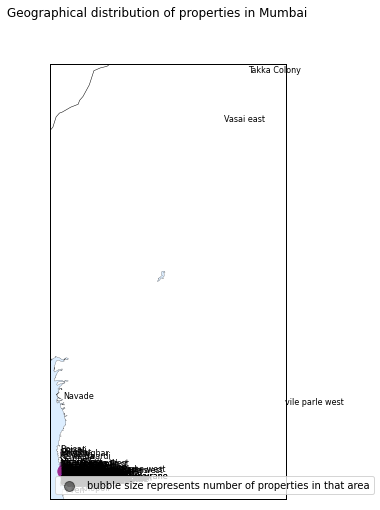

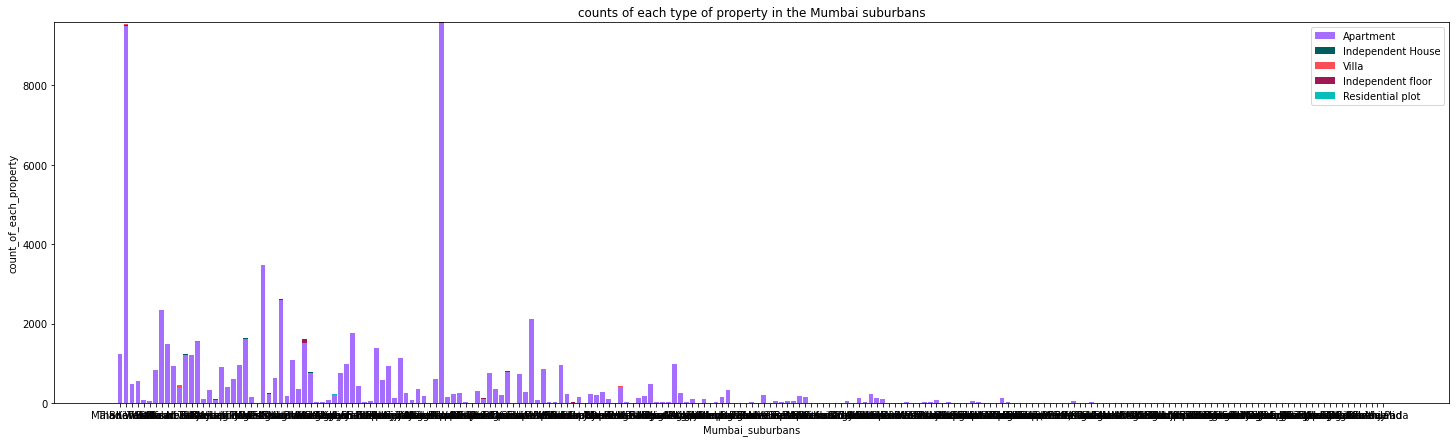

In [170]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,llcrnrlon=min(long_localities)-0.2,llcrnrlat=min(lat_localities)-0.2,urcrnrlon=max(long_localities)+0.2,urcrnrlat=max(lat_localities)+0.2,
            lat_0=28, lon_0=77)

m.shadedrelief()
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="white", lake_color='#DDEEFF')
m.drawcountries()

for i in range(len(count_localities)):
  x, y = m(long_localities[i],lat_localities[i])
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(x, y, 'ok', markersize=count_localities[i]*100,color=col)
  plt.text(x, y, localities[i], fontsize=8)


fig.suptitle("Geographical distribution of properties in Mumbai", fontsize=12)

plt.scatter([], [], c='k', alpha=0.5, s=100,
                label='bubble size represents number of properties in that area')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left')

df_Sub_urban_names_che = list(df[df.City_name=='Mumbai']['Locality_Name'].unique())
counts_type_list = [[] for i in range(len(property_types))]
for i in df_Sub_urban_names_che:
  df_part = df[df['Locality_Name']==i]
  for j in range(len(property_types)):
    counts_type_list[j].append(df_part[df_part['Property_type']==property_types[j]]['City_name'].count())
count_type_list = []
for i in counts_type_list:
  count_type_list.append(np.array(i))

plt.figure(figsize=(25,7))
plt.bar(df_Sub_urban_names_che, count_type_list[0], color='#a56eff')
plt.bar(df_Sub_urban_names_che, count_type_list[1], bottom=count_type_list[0], color='#005d5d')
plt.bar(df_Sub_urban_names_che, count_type_list[2], bottom=count_type_list[0]+count_type_list[1], color='#fa4d56')
plt.bar(df_Sub_urban_names_che, count_type_list[3], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2], color='#9f1853')
plt.bar(df_Sub_urban_names_che, count_type_list[4], bottom=count_type_list[0]+count_type_list[1]+count_type_list[2]+count_type_list[3], color='#08bdba')

plt.xlabel("Mumbai_suburbans")
plt.ylabel("count_of_each_property")
plt.legend(["Apartment", "Independent House", "Villa", "Independent floor","Residential plot"])
plt.title("counts of each type of property in the Mumbai suburbans",fontdict = {'fontsize':12})
plt.show()